<a href="https://colab.research.google.com/github/yebinGold/bigdata-final-project/blob/main/%5B%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%5D_%ED%95%99%EA%B8%B0%EB%A7%90_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [2024-2 빅데이터 학기말 개인 프로젝트]
### 서울 지하철 신설 노선 수요 예측 모델을 통한 강북구 <신강북선 유치> 공약 실효성 분석
한국외국어대학교 서울캠퍼스 ELLT학과 202000709 김예빈

##1. 구글 드라이브 연동

In [ ]:
# 드라이브 연동(mount)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터 불러오기
import os
os.chdir('/content/drive/MyDrive/Bigdata')

In [ ]:
# 데이터 시각화에 필요한 라이브러리 미리 호출
import matplotlib.pyplot as plt

# 한글 깨짐 문제 해결
!pip install koreanize-matplotlib

import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 22.7 MB/s eta 0:00:00


## 2. 분석에 활용할 feature 데이터 파일 전처리 작업

In [ ]:
import pandas as pd

### 서울시 행정동별 상권변화지표
- 상권 변화 지표: LL 다이나믹 - LH 상권확장 - HH 정체 HL 상권축소
- 순서에 맞게 수치형 데이터로 변환하여 점수를 매긴다. (최대 4점-최소1점)
- 최신 데이터 반영을 위해 2024 2분기 자료만 분석에 활용한다.

In [ ]:
df = pd.read_csv('서울시 상권분석서비스(상권변화지표-행정동).csv', encoding='cp949')
df

,기준_년분기_코드,행정동_코드,행정동_코드_명,상권_변화_지표,상권_변화_지표_명,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균
0,20242,11110540,삼청동,LH,상권확장,104,57,112,53
1,20241,11110550,부암동,LH,상권확장,108,57,111,52
2,20242,11110550,부암동,LH,상권확장,110,57,112,53
3,20241,11110560,평창동,HH,정체,120,59,111,52
4,20242,11110560,평창동,HH,정체,121,60,112,53
...,...,...,...,...,...,...,...,...,...
9345,20232,11710562,방이2동,LL,다이나믹,95,49,106,52
9346,20232,11680565,청담동,LL,다이나믹,101,51,106,52
9347,20232,11710520,풍납2동,HH,정체,121,54,106,52
9348,20232,11740550,고덕1동,LL,다이나믹,82,49,106,52


In [ ]:
# 최신 데이터 반영을 위해 2024 2분기 자료만 분석에 활용한다.
df = df[df['기준_년분기_코드'] == 20242]

# 순서에 맞게 수치형 데이터로 변환한다.
df['상권_변화_지표'] = df['상권_변화_지표'].replace({'LL': 4, 'LH': 3, 'HH': 2, 'HL': 1}) # 상권 점수 부여
df

<ipython-input-143-44789b2e6162>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['상권_변화_지표'] = df['상권_변화_지표'].replace({'LL': 4, 'LH': 3, 'HH': 2, 'HL': 1}) # 상권 점수 부여
<ipython-input-143-44789b2e6162>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['상권_변화_지표'] = df['상권_변화_지표'].replace({'LL': 4, 'LH': 3, 'HH': 2, 'HL': 1}) # 상권 점수 부여


,기준_년분기_코드,행정동_코드,행정동_코드_명,상권_변화_지표,상권_변화_지표_명,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균
0,20242,11110540,삼청동,3,상권확장,104,57,112,53
2,20242,11110550,부암동,3,상권확장,110,57,112,53
4,20242,11110560,평창동,2,정체,121,60,112,53
6,20242,11110570,무악동,2,정체,116,65,112,53
8,20242,11110580,교남동,2,정체,126,57,112,53
...,...,...,...,...,...,...,...,...,...
1829,20242,11740700,둔촌2동,1,상권축소,113,50,112,53
1830,20242,11740640,성내1동,1,상권축소,116,52,112,53
1831,20242,11740650,성내2동,4,다이나믹,107,45,112,53
1832,20242,11740660,성내3동,1,상권축소,117,48,112,53


In [ ]:
# 행정동_코드 column명을 행정동_ID로 수정, 행정동_코드_명 column명을 행정동_명칭으로 수정
df = df.rename(columns={'행정동_코드': '행정동_ID'})
df = df.rename(columns={'행정동_코드_명': '행정동_명칭'})

# 행정동_ID, 행정동_명칭, 상권_변화_지표 column만 추출
df = df[['행정동_ID', '행정동_명칭', '상권_변화_지표']]
df

,행정동_ID,행정동_명칭,상권_변화_지표
0,11110540,삼청동,3
2,11110550,부암동,3
4,11110560,평창동,2
6,11110570,무악동,2
8,11110580,교남동,2
...,...,...,...
1829,11740700,둔촌2동,1
1830,11740640,성내1동,1
1831,11740650,성내2동,4
1832,11740660,성내3동,1


In [ ]:
df.to_csv('preprocessed/서울시 상권변화지표.csv', index=False)

### 서울시 행정구역별 대학교 개황

In [ ]:
df = pd.read_excel('행정구역별 대학교 개황.xlsx')
df.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,시도,행정구역,구분,학제,학교수,학교수.1,학과수,재적학생수,재적학생수.1,전임교원수,전임교원수.1,입학정원,입학자,입학자.1,졸업자,졸업자.1,직원수,직원수.1
0,시도,행정구역,구분,학제,학교수,부설대학원,학과수,전체,여자,전체,여자,입학정원,전체,여자,전체,여자,전체,여자
1,서울,서울 종로구,학부,대학,2,-,136,34872,15147,1501,314,4732,5624,2728,5713,2627,692,242
2,서울,서울 종로구,학부,전문대학,1,-,46,3226,3183,78,48,1127,1364,1345,1190,1190,48,20
3,서울,서울 종로구,학부,방송통신대학,1,-,36,142719,93134,153,53,55050,12670,7693,21808,15934,655,290
4,서울,서울 종로구,학부,사이버대학,2,-,44,19526,9482,86,42,4135,4267,2065,4166,2038,128,69


In [ ]:
df = df[df['시도'] == '서울'][['행정구역', '구분', '학교수']]
df

,행정구역,구분,학교수
1,서울 종로구,학부,2
2,서울 종로구,학부,1
3,서울 종로구,학부,1
4,서울 종로구,학부,2
5,서울 종로구,학부,6
...,...,...,...
160,소계,학부,67
161,소계,대학원,21
162,소계,대학원,-
163,소계,대학원,21


In [ ]:
# 행정구역 기준으록 구분되는 데이터만
df = df[df['행정구역'] != '소계']

# 행정구 정보만 남김 (시 제외)
df['행정구역'] = df['행정구역'].str.replace('서울 ', '')

# 전체 학교(학부, 대학원)에 대한 소계를 구함
df = df[df['구분'] == '전체']

df

<ipython-input-148-a45fc536d76b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['행정구역'] = df['행정구역'].str.replace('서울 ', '')


,행정구역,구분,학교수
9,종로구,전체,8
16,중구,전체,3
23,용산구,전체,3
30,성동구,전체,3
36,광진구,전체,4
43,동대문구,전체,6
47,중랑구,전체,2
54,성북구,전체,8
60,강북구,전체,2
65,도봉구,전체,1


In [ ]:
# 대학이 없는 곳 -> 0개
df = df.fillna(0)

# 자치구, 대학 수 정보만 남김
df = df[['행정구역', '학교수']]

df

,행정구역,학교수
9,종로구,8
16,중구,3
23,용산구,3
30,성동구,3
36,광진구,4
43,동대문구,6
47,중랑구,2
54,성북구,8
60,강북구,2
65,도봉구,1


In [ ]:
df.to_csv('preprocessed/행정구역별 대학교 개황.csv', index=False)

### 서울시 읍면동마스터 정보(자치구, 행정동, 행정동 코드)

In [ ]:
df = pd.read_csv('서울시 읍면동마스터 정보.csv', encoding='cp949')
df.head()

,행정동_ID,행정동_명칭,자치구_명칭,시도_명칭
0,31380410,개군면,양평군,경기도
1,3138041,개군면,양평군,경기도
2,31380400,용문면,양평군,경기도
3,3138040,용문면,양평군,경기도
4,31380390,지평면,양평군,경기도


In [ ]:
df = df[df['시도_명칭'] == '서울']
df.head()

,행정동_ID,행정동_명칭,자치구_명칭,시도_명칭
1424,11250770,상일2동,강동구,서울
1425,11250760,상일1동,강동구,서울
1426,11250740,길동,강동구,서울
1427,1125074,길동,강동구,서울
1428,11250730,천호2동,강동구,서울


In [ ]:
df = df.drop(columns=['시도_명칭'])
df.head()

,행정동_ID,행정동_명칭,자치구_명칭
1424,11250770,상일2동,강동구
1425,11250760,상일1동,강동구
1426,11250740,길동,강동구
1427,1125074,길동,강동구
1428,11250730,천호2동,강동구


In [ ]:
# 행정동 ID의 길이가 8자리인 행만 추출 (최신 코드 개정 반영)
df = df[df['행정동_ID'].astype(str).str.len() == 8]
df

,행정동_ID,행정동_명칭,자치구_명칭
1424,11250770,상일2동,강동구
1425,11250760,상일1동,강동구
1426,11250740,길동,강동구
1428,11250730,천호2동,강동구
1430,11250720,암사1동,강동구
...,...,...,...
2259,11010570,무악동,종로구
2261,11010560,평창동,종로구
2263,11010550,부암동,종로구
2265,11010540,삼청동,종로구


In [ ]:
df.to_csv('preprocessed/서울시 읍면동마스터 정보.csv', index=False)

###서울시 행정동별 시간대별 지하철 이용객 수
- 최신 1년 데이터 중 행정동 코드 작성법 개편에 따라 다른 데이터와 매핑이 가능한 "8자리 행정동 코드"를 가진 데이터만 사용한다. (2024.08~)
- 총 승객 수가 누락된 행은 제거한다. (지하철이 지나지 않는 행정동, 여러 행정동 경계를 지나는 지하철 데이터는 한쪽으로만 저장되어 누락값이 발생할 수 있다.)
- 1년치 날짜별 데이터 vs. 시간대별 데이터
  - 승객 수와 유동인구의 시간대별 특성(ex. 출퇴근시간)을 고려하기 위해 시간대별 데이터로 학습 데이터셋을 구축한다.
  - 날짜별로 주어지는 공공데이터셋을 전처리하여 1시간 단위로 재구성함으로써 데이터의 수를 늘린다.
  - 유의미한 지하철 이용 추이를 보이는 오전 06시부터 밤 22시까지의 지하철 이용 정보를 사용한다.
  - 기존의 날짜 컬럼은 제거하되, 평일(0)과 주말(1)을 구분하는 '주말여부' 컬럼을 추가하여 승객 수 예측에 그 의미가 반영될 수 있도록 한다.
- 8월부터 최신(12월)까지의 4개월치 데이터(약 50만 행)를 사용하려고 하였으나, 조인 과정에서 용량 문제로 세션이 다운되는 문제가 발생했다. 이에 9월부터 11월까지 3개월치 데이터로 양을 줄여 분석을 진행하였다.


In [ ]:
subway_df = pd.read_csv('서울시 행정동별 지하철 총 승차 승객수 정보.csv', encoding='cp949')
subway_df.head()

,기준_날짜,행정동_ID,지하철_승객_수,지하철_승객_수_00시,지하철_승객_수_01시,지하철_승객_수_02시,지하철_승객_수_03시,지하철_승객_수_04시,지하철_승객_수_05시,지하철_승객_수_06시,...,지하철_승객_수_14시,지하철_승객_수_15시,지하철_승객_수_16시,지하철_승객_수_17시,지하철_승객_수_18시,지하철_승객_수_19시,지하철_승객_수_20시,지하철_승객_수_21시,지하철_승객_수_22시,지하철_승객_수_23시
0,20241214,11250770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20241214,11250760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20241214,11250740,7837.0,3.0,0.0,0.0,0.0,0.0,133.0,180.0,...,676.0,574.0,537.0,543.0,328.0,302.0,249.0,213.0,216.0,74.0
3,20241214,11250730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20241214,11250720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
subway_df.shape

(458207, 27)

In [ ]:
# 누락값이 포함된 행 제거
print(subway_df.isnull().any(axis=1).sum())

218426


In [ ]:
subway_df = subway_df.dropna(subset=['지하철_승객_수'])
subway_df

,기준_날짜,행정동_ID,지하철_승객_수,지하철_승객_수_00시,지하철_승객_수_01시,지하철_승객_수_02시,지하철_승객_수_03시,지하철_승객_수_04시,지하철_승객_수_05시,지하철_승객_수_06시,...,지하철_승객_수_14시,지하철_승객_수_15시,지하철_승객_수_16시,지하철_승객_수_17시,지하철_승객_수_18시,지하철_승객_수_19시,지하철_승객_수_20시,지하철_승객_수_21시,지하철_승객_수_22시,지하철_승객_수_23시
2,20241214,11250740,7837.0,3.0,0.0,0.0,0.0,0.0,133.0,180.0,...,676.0,574.0,537.0,543.0,328.0,302.0,249.0,213.0,216.0,74.0
5,20241214,11250710,8936.0,0.0,0.0,0.0,0.0,0.0,73.0,159.0,...,1155.0,818.0,635.0,480.0,253.0,145.0,131.0,94.0,85.0,22.0
6,20241214,11250700,10272.0,0.0,0.0,0.0,0.0,0.0,147.0,164.0,...,922.0,901.0,873.0,789.0,546.0,399.0,323.0,340.0,248.0,126.0
8,20241214,11250660,54372.0,10.0,0.0,0.0,0.0,9.0,792.0,866.0,...,4724.0,4642.0,4897.0,4496.0,3430.0,2679.0,2414.0,1897.0,1571.0,780.0
9,20241214,11250650,7990.0,0.0,0.0,0.0,0.0,2.0,116.0,177.0,...,674.0,618.0,606.0,493.0,414.0,239.0,240.0,177.0,160.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458199,20211130,1107065,9869.0,2.0,0.0,0.0,0.0,0.0,248.0,527.0,...,361.0,360.0,408.0,449.0,531.0,319.0,229.0,153.0,134.0,61.0
458202,20211130,1105057,10728.0,1.0,0.0,0.0,0.0,0.0,182.0,467.0,...,432.0,394.0,562.0,662.0,762.0,422.0,281.0,300.0,150.0,30.0
458203,20211130,1101061,95603.0,4.0,0.0,0.0,0.0,18.0,279.0,355.0,...,4781.0,6015.0,7236.0,12936.0,19579.0,8734.0,6512.0,7032.0,5214.0,1713.0
458204,20211130,1114066,101870.0,11.0,0.0,0.0,0.0,20.0,934.0,2075.0,...,3973.0,4469.0,5575.0,8175.0,13185.0,8303.0,6423.0,7907.0,7051.0,2576.0


In [ ]:
# 최신 데이터 사용
subway_df = subway_df[subway_df['기준_날짜'] > 20240801].reset_index(drop=True)
subway_df

,기준_날짜,행정동_ID,지하철_승객_수,지하철_승객_수_00시,지하철_승객_수_01시,지하철_승객_수_02시,지하철_승객_수_03시,지하철_승객_수_04시,지하철_승객_수_05시,지하철_승객_수_06시,...,지하철_승객_수_14시,지하철_승객_수_15시,지하철_승객_수_16시,지하철_승객_수_17시,지하철_승객_수_18시,지하철_승객_수_19시,지하철_승객_수_20시,지하철_승객_수_21시,지하철_승객_수_22시,지하철_승객_수_23시
0,20241214,11250740,7837.0,3.0,0.0,0.0,0.0,0.0,133.0,180.0,...,676.0,574.0,537.0,543.0,328.0,302.0,249.0,213.0,216.0,74.0
1,20241214,11250710,8936.0,0.0,0.0,0.0,0.0,0.0,73.0,159.0,...,1155.0,818.0,635.0,480.0,253.0,145.0,131.0,94.0,85.0,22.0
2,20241214,11250700,10272.0,0.0,0.0,0.0,0.0,0.0,147.0,164.0,...,922.0,901.0,873.0,789.0,546.0,399.0,323.0,340.0,248.0,126.0
3,20241214,11250660,54372.0,10.0,0.0,0.0,0.0,9.0,792.0,866.0,...,4724.0,4642.0,4897.0,4496.0,3430.0,2679.0,2414.0,1897.0,1571.0,780.0
4,20241214,11250650,7990.0,0.0,0.0,0.0,0.0,2.0,116.0,177.0,...,674.0,618.0,606.0,493.0,414.0,239.0,240.0,177.0,160.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29870,20240803,11160640,20661.0,1.0,0.0,0.0,0.0,0.0,298.0,390.0,...,1549.0,1888.0,2150.0,1540.0,1149.0,816.0,887.0,731.0,566.0,247.0
29871,20240803,11160540,13928.0,0.0,0.0,0.0,0.0,5.0,381.0,402.0,...,917.0,923.0,1085.0,906.0,656.0,491.0,372.0,338.0,315.0,89.0
29872,20240803,11160520,3557.0,0.0,0.0,0.0,0.0,0.0,71.0,115.0,...,245.0,207.0,252.0,195.0,154.0,124.0,112.0,78.0,72.0,18.0
29873,20240803,11150700,4092.0,0.0,0.0,0.0,0.0,1.0,111.0,171.0,...,236.0,246.0,246.0,195.0,154.0,79.0,63.0,73.0,50.0,16.0


In [ ]:
# 불필요한 컬럼 제거 (00시~05시, 23시)
subway_df = subway_df.drop(columns=['지하철_승객_수_00시','지하철_승객_수_01시','지하철_승객_수_02시','지하철_승객_수_03시','지하철_승객_수_04시','지하철_승객_수_05시','지하철_승객_수_23시'])

In [ ]:
# 불필요한 컬럼 제거 (지하철 총 승객 수)
subway_df = subway_df.drop(columns=['지하철_승객_수'])
subway_df

,기준_날짜,행정동_ID,지하철_승객_수_06시,지하철_승객_수_07시,지하철_승객_수_08시,지하철_승객_수_09시,지하철_승객_수_10시,지하철_승객_수_11시,지하철_승객_수_12시,지하철_승객_수_13시,지하철_승객_수_14시,지하철_승객_수_15시,지하철_승객_수_16시,지하철_승객_수_17시,지하철_승객_수_18시,지하철_승객_수_19시,지하철_승객_수_20시,지하철_승객_수_21시,지하철_승객_수_22시
0,20241214,11250740,180.0,238.0,388.0,465.0,562.0,706.0,753.0,697.0,676.0,574.0,537.0,543.0,328.0,302.0,249.0,213.0,216.0
1,20241214,11250710,159.0,291.0,485.0,578.0,675.0,852.0,905.0,1100.0,1155.0,818.0,635.0,480.0,253.0,145.0,131.0,94.0,85.0
2,20241214,11250700,164.0,303.0,461.0,592.0,667.0,711.0,907.0,853.0,922.0,901.0,873.0,789.0,546.0,399.0,323.0,340.0,248.0
3,20241214,11250660,866.0,1387.0,2227.0,2561.0,2865.0,3557.0,4099.0,4469.0,4724.0,4642.0,4897.0,4496.0,3430.0,2679.0,2414.0,1897.0,1571.0
4,20241214,11250650,177.0,267.0,460.0,549.0,686.0,672.0,688.0,701.0,674.0,618.0,606.0,493.0,414.0,239.0,240.0,177.0,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29870,20240803,11160640,390.0,671.0,944.0,1181.0,1185.0,1325.0,1599.0,1544.0,1549.0,1888.0,2150.0,1540.0,1149.0,816.0,887.0,731.0,566.0
29871,20240803,11160540,402.0,598.0,980.0,1099.0,1123.0,1108.0,1054.0,1086.0,917.0,923.0,1085.0,906.0,656.0,491.0,372.0,338.0,315.0
29872,20240803,11160520,115.0,147.0,268.0,290.0,285.0,286.0,324.0,314.0,245.0,207.0,252.0,195.0,154.0,124.0,112.0,78.0,72.0
29873,20240803,11150700,171.0,244.0,364.0,340.0,348.0,317.0,454.0,384.0,236.0,246.0,246.0,195.0,154.0,79.0,63.0,73.0,50.0


### EDA - 날짜 정보 요일별로? 평일/주말?

In [ ]:
# 날짜를 datetime 형식으로 변환
subway_df['날짜'] = pd.to_datetime(subway_df['기준_날짜'], format="%Y%m%d")

# 요일 계산으로 평일/주말 구분
subway_df['요일'] = subway_df['날짜'].dt.weekday  # ex) Monday: 0, Tuesday: 1, ...

subway_df

,기준_날짜,행정동_ID,지하철_승객_수_06시,지하철_승객_수_07시,지하철_승객_수_08시,지하철_승객_수_09시,지하철_승객_수_10시,지하철_승객_수_11시,지하철_승객_수_12시,지하철_승객_수_13시,...,지하철_승객_수_15시,지하철_승객_수_16시,지하철_승객_수_17시,지하철_승객_수_18시,지하철_승객_수_19시,지하철_승객_수_20시,지하철_승객_수_21시,지하철_승객_수_22시,날짜,요일
0,20241214,11250740,180.0,238.0,388.0,465.0,562.0,706.0,753.0,697.0,...,574.0,537.0,543.0,328.0,302.0,249.0,213.0,216.0,2024-12-14,5
1,20241214,11250710,159.0,291.0,485.0,578.0,675.0,852.0,905.0,1100.0,...,818.0,635.0,480.0,253.0,145.0,131.0,94.0,85.0,2024-12-14,5
2,20241214,11250700,164.0,303.0,461.0,592.0,667.0,711.0,907.0,853.0,...,901.0,873.0,789.0,546.0,399.0,323.0,340.0,248.0,2024-12-14,5
3,20241214,11250660,866.0,1387.0,2227.0,2561.0,2865.0,3557.0,4099.0,4469.0,...,4642.0,4897.0,4496.0,3430.0,2679.0,2414.0,1897.0,1571.0,2024-12-14,5
4,20241214,11250650,177.0,267.0,460.0,549.0,686.0,672.0,688.0,701.0,...,618.0,606.0,493.0,414.0,239.0,240.0,177.0,160.0,2024-12-14,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29870,20240803,11160640,390.0,671.0,944.0,1181.0,1185.0,1325.0,1599.0,1544.0,...,1888.0,2150.0,1540.0,1149.0,816.0,887.0,731.0,566.0,2024-08-03,5
29871,20240803,11160540,402.0,598.0,980.0,1099.0,1123.0,1108.0,1054.0,1086.0,...,923.0,1085.0,906.0,656.0,491.0,372.0,338.0,315.0,2024-08-03,5
29872,20240803,11160520,115.0,147.0,268.0,290.0,285.0,286.0,324.0,314.0,...,207.0,252.0,195.0,154.0,124.0,112.0,78.0,72.0,2024-08-03,5
29873,20240803,11150700,171.0,244.0,364.0,340.0,348.0,317.0,454.0,384.0,...,246.0,246.0,195.0,154.0,79.0,63.0,73.0,50.0,2024-08-03,5


In [ ]:
# 최근 일주일 데이터를 가지고 EDA
test = subway_df[(subway_df['행정동_ID'] == 11250660) & (subway_df['기준_날짜'] >= 20241202) & (subway_df['기준_날짜'] <= 20241208)]
test

,기준_날짜,행정동_ID,지하철_승객_수_06시,지하철_승객_수_07시,지하철_승객_수_08시,지하철_승객_수_09시,지하철_승객_수_10시,지하철_승객_수_11시,지하철_승객_수_12시,지하철_승객_수_13시,...,지하철_승객_수_15시,지하철_승객_수_16시,지하철_승객_수_17시,지하철_승객_수_18시,지하철_승객_수_19시,지하철_승객_수_20시,지하철_승객_수_21시,지하철_승객_수_22시,날짜,요일
1341,20241208,11250660,602.0,783.0,1399.0,1844.0,2106.0,2239.0,2626.0,2889.0,...,3285.0,3248.0,2980.0,2590.0,2143.0,1874.0,1257.0,873.0,2024-12-08,6
1564,20241207,11250660,936.0,1357.0,2139.0,2562.0,2777.0,3446.0,3924.0,4239.0,...,4819.0,5207.0,4418.0,3346.0,2483.0,2560.0,1790.0,1468.0,2024-12-07,5
1787,20241206,11250660,2012.0,5572.0,7235.0,3513.0,2378.0,2543.0,2747.0,2776.0,...,3565.0,4260.0,5443.0,6192.0,3220.0,2705.0,2096.0,1704.0,2024-12-06,4
2010,20241205,11250660,2091.0,5937.0,7388.0,3783.0,2527.0,2438.0,2766.0,2704.0,...,3191.0,4058.0,4998.0,5157.0,3287.0,2639.0,2012.0,1437.0,2024-12-05,3
2233,20241204,11250660,2058.0,5796.0,7547.0,3739.0,2522.0,2452.0,2731.0,2696.0,...,3198.0,3755.0,5101.0,5395.0,3104.0,2455.0,1886.0,1446.0,2024-12-04,2
2456,20241203,11250660,2119.0,6097.0,7787.0,3858.0,2508.0,2319.0,2578.0,2605.0,...,3068.0,3689.0,4979.0,5379.0,3238.0,2531.0,1976.0,1482.0,2024-12-03,1
2679,20241202,11250660,2201.0,6083.0,7418.0,3768.0,2453.0,2567.0,2842.0,2530.0,...,3015.0,3593.0,4679.0,5333.0,3198.0,2393.0,1778.0,1231.0,2024-12-02,0


In [ ]:
# 시각화에 불필요한 컬럼 제거
test = test.drop(columns=['기준_날짜', '행정동_ID', '날짜'])

# 요일을 인덱스로 설정
test.set_index('요일', inplace=True)

test

KeyError: "['기준_날짜', '행정동_ID', '날짜'] not found in axis"

In [ ]:
# 인덱스 데이터 수정하기 ex) 0 -> 월요일
day_mapping = {0: '월요일', 1: '화요일', 2: '수요일', 3: '목요일', 4: '금요일', 5: '토요일', 6: '일요일'}
test.index = test.index.map(day_mapping)
test

,지하철_승객_수_06시,지하철_승객_수_07시,지하철_승객_수_08시,지하철_승객_수_09시,지하철_승객_수_10시,지하철_승객_수_11시,지하철_승객_수_12시,지하철_승객_수_13시,지하철_승객_수_14시,지하철_승객_수_15시,지하철_승객_수_16시,지하철_승객_수_17시,지하철_승객_수_18시,지하철_승객_수_19시,지하철_승객_수_20시,지하철_승객_수_21시,지하철_승객_수_22시
요일,,,,,,,,,,,,,,,,,
일요일,602.0,783.0,1399.0,1844.0,2106.0,2239.0,2626.0,2889.0,3019.0,3285.0,3248.0,2980.0,2590.0,2143.0,1874.0,1257.0,873.0
토요일,936.0,1357.0,2139.0,2562.0,2777.0,3446.0,3924.0,4239.0,4416.0,4819.0,5207.0,4418.0,3346.0,2483.0,2560.0,1790.0,1468.0
금요일,2012.0,5572.0,7235.0,3513.0,2378.0,2543.0,2747.0,2776.0,2933.0,3565.0,4260.0,5443.0,6192.0,3220.0,2705.0,2096.0,1704.0
목요일,2091.0,5937.0,7388.0,3783.0,2527.0,2438.0,2766.0,2704.0,2822.0,3191.0,4058.0,4998.0,5157.0,3287.0,2639.0,2012.0,1437.0
수요일,2058.0,5796.0,7547.0,3739.0,2522.0,2452.0,2731.0,2696.0,2814.0,3198.0,3755.0,5101.0,5395.0,3104.0,2455.0,1886.0,1446.0
화요일,2119.0,6097.0,7787.0,3858.0,2508.0,2319.0,2578.0,2605.0,2721.0,3068.0,3689.0,4979.0,5379.0,3238.0,2531.0,1976.0,1482.0
월요일,2201.0,6083.0,7418.0,3768.0,2453.0,2567.0,2842.0,2530.0,2759.0,3015.0,3593.0,4679.0,5333.0,3198.0,2393.0,1778.0,1231.0


In [ ]:
# 역순 정렬
test = test.iloc[::-1]
test

,지하철_승객_수_06시,지하철_승객_수_07시,지하철_승객_수_08시,지하철_승객_수_09시,지하철_승객_수_10시,지하철_승객_수_11시,지하철_승객_수_12시,지하철_승객_수_13시,지하철_승객_수_14시,지하철_승객_수_15시,지하철_승객_수_16시,지하철_승객_수_17시,지하철_승객_수_18시,지하철_승객_수_19시,지하철_승객_수_20시,지하철_승객_수_21시,지하철_승객_수_22시
요일,,,,,,,,,,,,,,,,,
월요일,2201.0,6083.0,7418.0,3768.0,2453.0,2567.0,2842.0,2530.0,2759.0,3015.0,3593.0,4679.0,5333.0,3198.0,2393.0,1778.0,1231.0
화요일,2119.0,6097.0,7787.0,3858.0,2508.0,2319.0,2578.0,2605.0,2721.0,3068.0,3689.0,4979.0,5379.0,3238.0,2531.0,1976.0,1482.0
수요일,2058.0,5796.0,7547.0,3739.0,2522.0,2452.0,2731.0,2696.0,2814.0,3198.0,3755.0,5101.0,5395.0,3104.0,2455.0,1886.0,1446.0
목요일,2091.0,5937.0,7388.0,3783.0,2527.0,2438.0,2766.0,2704.0,2822.0,3191.0,4058.0,4998.0,5157.0,3287.0,2639.0,2012.0,1437.0
금요일,2012.0,5572.0,7235.0,3513.0,2378.0,2543.0,2747.0,2776.0,2933.0,3565.0,4260.0,5443.0,6192.0,3220.0,2705.0,2096.0,1704.0
토요일,936.0,1357.0,2139.0,2562.0,2777.0,3446.0,3924.0,4239.0,4416.0,4819.0,5207.0,4418.0,3346.0,2483.0,2560.0,1790.0,1468.0
일요일,602.0,783.0,1399.0,1844.0,2106.0,2239.0,2626.0,2889.0,3019.0,3285.0,3248.0,2980.0,2590.0,2143.0,1874.0,1257.0,873.0


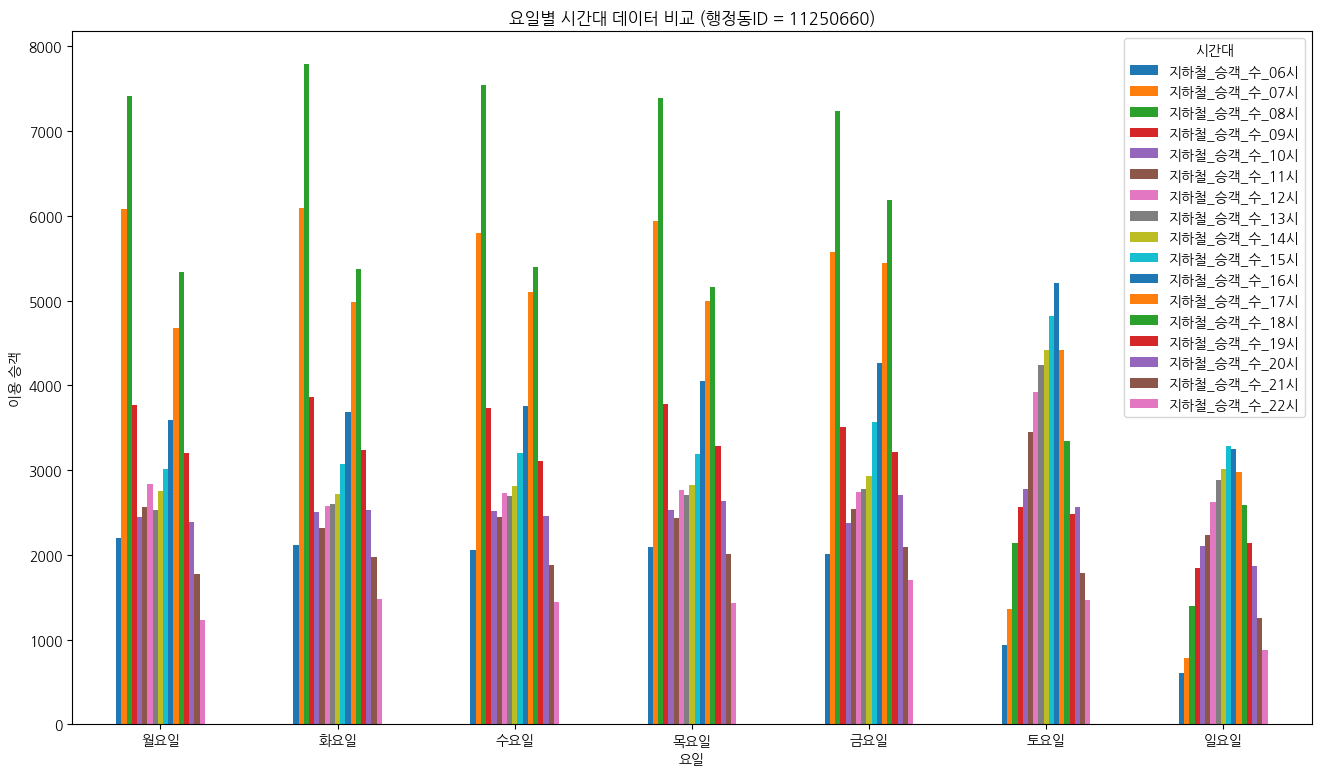

In [ ]:
# 요일별 막대 그래프 그리기

# 막대 그래프 그리기
test.plot(kind='bar', figsize=(16, 9))
plt.title('요일별 시간대 데이터 비교 (행정동ID = 11250660)')
plt.xlabel('요일')
plt.ylabel('이용 승객')
plt.legend(title='시간대')
plt.xticks(rotation=0)
plt.show()

In [ ]:
cols = subway_df.columns.tolist()
cols

['기준_날짜',
 '행정동_ID',
 '지하철_승객_수_06시',
 '지하철_승객_수_07시',
 '지하철_승객_수_08시',
 '지하철_승객_수_09시',
 '지하철_승객_수_10시',
 '지하철_승객_수_11시',
 '지하철_승객_수_12시',
 '지하철_승객_수_13시',
 '지하철_승객_수_14시',
 '지하철_승객_수_15시',
 '지하철_승객_수_16시',
 '지하철_승객_수_17시',
 '지하철_승객_수_18시',
 '지하철_승객_수_19시',
 '지하철_승객_수_20시',
 '지하철_승객_수_21시',
 '지하철_승객_수_22시']

In [ ]:
# melt 함수 사용하여 데이터 변환
subway_df_melted = pd.melt(
    subway_df,
    id_vars = cols[:2],  # 고정할 열
    value_vars = cols[2:],  # 녹일 열
    var_name = '시간',  # 새 열 이름
    value_name = '지하철_승객_수'  # 값 열 이름
)

# 시간 열을 숫자 형태로 변환
subway_df_melted['시간'] = subway_df_melted['시간'].str.replace('지하철_승객_수_', '').str.replace('시', '').astype(int)

# 결과 출력
subway_df_melted

,기준_날짜,행정동_ID,시간,지하철_승객_수
0,20241214,11250740,6,180.0
1,20241214,11250710,6,159.0
2,20241214,11250700,6,164.0
3,20241214,11250660,6,866.0
4,20241214,11250650,6,177.0
...,...,...,...,...
507870,20240803,11160640,22,566.0
507871,20240803,11160540,22,315.0
507872,20240803,11160520,22,72.0
507873,20240803,11150700,22,50.0


### 서울시 행정동별 시간대별 버스 승차 정보

In [ ]:
bus_df = pd.read_csv('서울시 행정동별 버스 총 승차 승객수 정보.csv', encoding='cp949')
bus_df.head()

,기준_날짜,행정동_ID,버스_승객_수,버스_승객_수_00시,버스_승객_수_01시,버스_승객_수_02시,버스_승객_수_03시,버스_승객_수_04시,버스_승객_수_05시,버스_승객_수_06시,...,버스_승객_수_14시,버스_승객_수_15시,버스_승객_수_16시,버스_승객_수_17시,버스_승객_수_18시,버스_승객_수_19시,버스_승객_수_20시,버스_승객_수_21시,버스_승객_수_22시,버스_승객_수_23시
0,20241214,11250770,7386.0,115.0,8.0,9.0,7.0,33.0,77.0,148.0,...,524.0,474.0,519.0,456.0,445.0,358.0,373.0,319.0,306.0,277.0
1,20241214,11250760,2305.0,7.0,3.0,0.0,0.0,16.0,37.0,33.0,...,200.0,195.0,179.0,194.0,167.0,109.0,101.0,106.0,79.0,27.0
2,20241214,11250740,2638.0,13.0,0.0,0.0,1.0,10.0,29.0,59.0,...,215.0,216.0,181.0,187.0,126.0,84.0,84.0,59.0,45.0,25.0
3,20241214,11250730,6894.0,141.0,17.0,9.0,7.0,22.0,61.0,131.0,...,422.0,457.0,568.0,526.0,555.0,408.0,396.0,389.0,330.0,281.0
4,20241214,11250720,4710.0,53.0,4.0,4.0,5.0,6.0,22.0,89.0,...,363.0,326.0,298.0,305.0,282.0,219.0,202.0,179.0,174.0,104.0


In [ ]:
bus_df.shape

(457361, 27)

In [ ]:
bus_df.tail()

,기준_날짜,행정동_ID,버스_승객_수,버스_승객_수_00시,버스_승객_수_01시,버스_승객_수_02시,버스_승객_수_03시,버스_승객_수_04시,버스_승객_수_05시,버스_승객_수_06시,...,버스_승객_수_14시,버스_승객_수_15시,버스_승객_수_16시,버스_승객_수_17시,버스_승객_수_18시,버스_승객_수_19시,버스_승객_수_20시,버스_승객_수_21시,버스_승객_수_22시,버스_승객_수_23시
457356,20220101,1110061,2480.0,5.0,0.0,0.0,0.0,5.0,43.0,66.0,...,193.0,212.0,196.0,195.0,119.0,112.0,69.0,112.0,38.0,30.0
457357,20220101,1110060,3485.0,19.0,0.0,0.0,1.0,24.0,78.0,79.0,...,291.0,313.0,278.0,243.0,196.0,126.0,120.0,148.0,86.0,43.0
457358,20220101,1110056,2377.0,1.0,0.0,0.0,0.0,7.0,54.0,83.0,...,218.0,215.0,192.0,176.0,125.0,76.0,72.0,61.0,34.0,14.0
457359,20220101,1115069,2229.0,6.0,0.0,0.0,0.0,4.0,23.0,61.0,...,189.0,144.0,174.0,201.0,165.0,83.0,80.0,159.0,128.0,39.0
457360,20220101,1115065,1353.0,5.0,0.0,0.0,0.0,7.0,13.0,35.0,...,95.0,130.0,107.0,102.0,77.0,45.0,91.0,92.0,53.0,21.0


In [ ]:
# 최근 약 4개월간의 최신 데이터만 사용하여 행정동별 버스 이용객 수를 사용한다.
bus_df = bus_df[bus_df['기준_날짜'] > 20240802]
bus_df

,기준_날짜,행정동_ID,버스_승객_수,버스_승객_수_00시,버스_승객_수_01시,버스_승객_수_02시,버스_승객_수_03시,버스_승객_수_04시,버스_승객_수_05시,버스_승객_수_06시,...,버스_승객_수_14시,버스_승객_수_15시,버스_승객_수_16시,버스_승객_수_17시,버스_승객_수_18시,버스_승객_수_19시,버스_승객_수_20시,버스_승객_수_21시,버스_승객_수_22시,버스_승객_수_23시
0,20241214,11250770,7386.0,115.0,8.0,9.0,7.0,33.0,77.0,148.0,...,524.0,474.0,519.0,456.0,445.0,358.0,373.0,319.0,306.0,277.0
1,20241214,11250760,2305.0,7.0,3.0,0.0,0.0,16.0,37.0,33.0,...,200.0,195.0,179.0,194.0,167.0,109.0,101.0,106.0,79.0,27.0
2,20241214,11250740,2638.0,13.0,0.0,0.0,1.0,10.0,29.0,59.0,...,215.0,216.0,181.0,187.0,126.0,84.0,84.0,59.0,45.0,25.0
3,20241214,11250730,6894.0,141.0,17.0,9.0,7.0,22.0,61.0,131.0,...,422.0,457.0,568.0,526.0,555.0,408.0,396.0,389.0,330.0,281.0
4,20241214,11250720,4710.0,53.0,4.0,4.0,5.0,6.0,22.0,89.0,...,363.0,326.0,298.0,305.0,282.0,219.0,202.0,179.0,174.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56945,20240803,11100610,4301.0,13.0,0.0,0.0,0.0,17.0,111.0,135.0,...,265.0,260.0,215.0,292.0,255.0,186.0,151.0,112.0,81.0,62.0
56946,20240803,11100600,5913.0,17.0,0.0,0.0,0.0,33.0,163.0,172.0,...,407.0,352.0,339.0,399.0,351.0,232.0,168.0,147.0,124.0,60.0
56947,20240803,11100560,3571.0,14.0,0.0,0.0,0.0,9.0,86.0,99.0,...,184.0,213.0,235.0,238.0,199.0,137.0,105.0,90.0,56.0,27.0
56948,20240803,11150690,6234.0,18.0,0.0,0.0,0.0,14.0,72.0,156.0,...,421.0,404.0,475.0,479.0,464.0,251.0,197.0,254.0,252.0,97.0


In [ ]:
# 불필요한 컬럼 제거 (00시~05시, 23시)
bus_df = bus_df.drop(columns=['버스_승객_수_00시','버스_승객_수_01시','버스_승객_수_02시','버스_승객_수_03시','버스_승객_수_04시','버스_승객_수_05시','버스_승객_수_23시'])

# 불필요한 컬럼 제거 (총 승객 수)
bus_df = bus_df.drop(columns=['버스_승객_수'])

In [ ]:
# 데이터프레임 축소 - 지하철이 지나지 않는 행정동 관련 행은 제거한다.
subway_dong = subway_df['행정동_ID'].unique()
bus_df = bus_df[bus_df['행정동_ID'].isin(subway_dong)]

bus_df

,기준_날짜,행정동_ID,버스_승객_수_06시,버스_승객_수_07시,버스_승객_수_08시,버스_승객_수_09시,버스_승객_수_10시,버스_승객_수_11시,버스_승객_수_12시,버스_승객_수_13시,버스_승객_수_14시,버스_승객_수_15시,버스_승객_수_16시,버스_승객_수_17시,버스_승객_수_18시,버스_승객_수_19시,버스_승객_수_20시,버스_승객_수_21시,버스_승객_수_22시
2,20241214,11250740,59.0,93.0,159.0,197.0,220.0,205.0,205.0,216.0,215.0,216.0,181.0,187.0,126.0,84.0,84.0,59.0,45.0
5,20241214,11250710,98.0,175.0,254.0,313.0,317.0,320.0,320.0,431.0,410.0,467.0,448.0,519.0,525.0,491.0,480.0,427.0,311.0
6,20241214,11250700,23.0,28.0,56.0,95.0,82.0,144.0,144.0,159.0,151.0,178.0,177.0,171.0,164.0,127.0,157.0,111.0,110.0
8,20241214,11250660,152.0,200.0,331.0,398.0,353.0,404.0,404.0,485.0,509.0,581.0,620.0,706.0,643.0,465.0,506.0,479.0,416.0
9,20241214,11250650,75.0,94.0,175.0,270.0,240.0,264.0,264.0,317.0,300.0,318.0,316.0,335.0,259.0,197.0,205.0,238.0,188.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56934,20240803,11160640,80.0,155.0,254.0,337.0,344.0,415.0,415.0,562.0,512.0,451.0,545.0,609.0,492.0,443.0,390.0,426.0,455.0
56938,20240803,11160540,154.0,224.0,353.0,479.0,566.0,632.0,632.0,810.0,796.0,834.0,1026.0,809.0,759.0,653.0,608.0,588.0,458.0
56939,20240803,11160520,128.0,230.0,344.0,413.0,406.0,473.0,473.0,543.0,510.0,520.0,583.0,656.0,611.0,496.0,458.0,443.0,399.0
56941,20240803,11150700,90.0,118.0,195.0,241.0,237.0,212.0,212.0,196.0,138.0,142.0,179.0,188.0,141.0,84.0,60.0,50.0,35.0


In [ ]:
# 데이터프레임 축소 - 지하철 데이터에 포함되지 않은 날짜 관련 행은 삭제한다.
bus_df = bus_df[bus_df['기준_날짜'].isin(subway_df['기준_날짜'])].reset_index(drop=True)
bus_df

,기준_날짜,행정동_ID,버스_승객_수_06시,버스_승객_수_07시,버스_승객_수_08시,버스_승객_수_09시,버스_승객_수_10시,버스_승객_수_11시,버스_승객_수_12시,버스_승객_수_13시,버스_승객_수_14시,버스_승객_수_15시,버스_승객_수_16시,버스_승객_수_17시,버스_승객_수_18시,버스_승객_수_19시,버스_승객_수_20시,버스_승객_수_21시,버스_승객_수_22시
0,20241214,11250740,59.0,93.0,159.0,197.0,220.0,205.0,205.0,216.0,215.0,216.0,181.0,187.0,126.0,84.0,84.0,59.0,45.0
1,20241214,11250710,98.0,175.0,254.0,313.0,317.0,320.0,320.0,431.0,410.0,467.0,448.0,519.0,525.0,491.0,480.0,427.0,311.0
2,20241214,11250700,23.0,28.0,56.0,95.0,82.0,144.0,144.0,159.0,151.0,178.0,177.0,171.0,164.0,127.0,157.0,111.0,110.0
3,20241214,11250660,152.0,200.0,331.0,398.0,353.0,404.0,404.0,485.0,509.0,581.0,620.0,706.0,643.0,465.0,506.0,479.0,416.0
4,20241214,11250650,75.0,94.0,175.0,270.0,240.0,264.0,264.0,317.0,300.0,318.0,316.0,335.0,259.0,197.0,205.0,238.0,188.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29877,20240803,11160640,80.0,155.0,254.0,337.0,344.0,415.0,415.0,562.0,512.0,451.0,545.0,609.0,492.0,443.0,390.0,426.0,455.0
29878,20240803,11160540,154.0,224.0,353.0,479.0,566.0,632.0,632.0,810.0,796.0,834.0,1026.0,809.0,759.0,653.0,608.0,588.0,458.0
29879,20240803,11160520,128.0,230.0,344.0,413.0,406.0,473.0,473.0,543.0,510.0,520.0,583.0,656.0,611.0,496.0,458.0,443.0,399.0
29880,20240803,11150700,90.0,118.0,195.0,241.0,237.0,212.0,212.0,196.0,138.0,142.0,179.0,188.0,141.0,84.0,60.0,50.0,35.0


In [ ]:
cols = bus_df.columns.tolist()
cols

['기준_날짜',
 '행정동_ID',
 '버스_승객_수_06시',
 '버스_승객_수_07시',
 '버스_승객_수_08시',
 '버스_승객_수_09시',
 '버스_승객_수_10시',
 '버스_승객_수_11시',
 '버스_승객_수_12시',
 '버스_승객_수_13시',
 '버스_승객_수_14시',
 '버스_승객_수_15시',
 '버스_승객_수_16시',
 '버스_승객_수_17시',
 '버스_승객_수_18시',
 '버스_승객_수_19시',
 '버스_승객_수_20시',
 '버스_승객_수_21시',
 '버스_승객_수_22시']

In [ ]:
# melt 함수 사용하여 데이터 변환
bus_df_melted = pd.melt(
    bus_df,
    id_vars = cols[:2],  # 고정할 열
    value_vars = cols[2:],  # 녹일 열
    var_name = '시간',  # 새 열 이름
    value_name = '버스_승객_수'  # 값 열 이름
)

# 시간 열을 숫자 형태로 변환
bus_df_melted['시간'] = bus_df_melted['시간'].str.replace('버스_승객_수_', '').str.replace('시', '').astype(int)

# 결과 출력
bus_df_melted

,기준_날짜,행정동_ID,시간,버스_승객_수
0,20241214,11250740,6,59.0
1,20241214,11250710,6,98.0
2,20241214,11250700,6,23.0
3,20241214,11250660,6,152.0
4,20241214,11250650,6,75.0
...,...,...,...,...
507989,20240803,11160640,22,455.0
507990,20240803,11160540,22,458.0
507991,20240803,11160520,22,399.0
507992,20240803,11150700,22,35.0


In [ ]:
traffic_df = pd.merge(subway_df_melted, bus_df_melted, on=['기준_날짜', '행정동_ID', '시간'], how='left')  # 지하철 이용 승객 데이터를 기준으로 조인
traffic_df

,기준_날짜,행정동_ID,시간,지하철_승객_수,버스_승객_수
0,20241214,11250740,6,180.0,59.0
1,20241214,11250710,6,159.0,98.0
2,20241214,11250700,6,164.0,23.0
3,20241214,11250660,6,866.0,152.0
4,20241214,11250650,6,177.0,75.0
...,...,...,...,...,...
507870,20240803,11160640,22,566.0,455.0
507871,20240803,11160540,22,315.0,458.0
507872,20240803,11160520,22,72.0,399.0
507873,20240803,11150700,22,50.0,35.0


In [ ]:
# 날짜별로 평일 / 주말을 나눠서 새로운 컬럼 생성

# 날짜를 datetime 형식으로 변환
traffic_df['기준_날짜'] = pd.to_datetime(traffic_df['기준_날짜'], format='%Y%m%d')

# 요일 계산으로 평일/주말 구분
traffic_df['주말여부'] = traffic_df['날짜'].dt.weekday >= 5  # 5(토요일) 또는 6(일요일)은 True
traffic_df['주말여부'] = traffic_df['주말여부'].apply(lambda x: 1 if x else 0)

traffic_df

,기준_날짜,행정동_ID,시간,지하철_승객_수,버스_승객_수,날짜,주말여부
0,2024-12-14,11250740,6,180.0,59.0,2024-12-14,1
1,2024-12-14,11250710,6,159.0,98.0,2024-12-14,1
2,2024-12-14,11250700,6,164.0,23.0,2024-12-14,1
3,2024-12-14,11250660,6,866.0,152.0,2024-12-14,1
4,2024-12-14,11250650,6,177.0,75.0,2024-12-14,1
...,...,...,...,...,...,...,...
507870,2024-08-03,11160640,22,566.0,455.0,2024-08-03,1
507871,2024-08-03,11160540,22,315.0,458.0,2024-08-03,1
507872,2024-08-03,11160520,22,72.0,399.0,2024-08-03,1
507873,2024-08-03,11150700,22,50.0,35.0,2024-08-03,1


In [ ]:
traffic_df = traffic_df.drop(columns=['날짜'])

,기준_날짜,행정동_ID,시간,지하철_승객_수,버스_승객_수,주말여부
0,2024-12-14,11250740,6,180.0,59.0,1
1,2024-12-14,11250710,6,159.0,98.0,1
2,2024-12-14,11250700,6,164.0,23.0,1
3,2024-12-14,11250660,6,866.0,152.0,1
4,2024-12-14,11250650,6,177.0,75.0,1
...,...,...,...,...,...,...
507870,2024-08-03,11160640,22,566.0,455.0,1
507871,2024-08-03,11160540,22,315.0,458.0,1
507872,2024-08-03,11160520,22,72.0,399.0,1
507873,2024-08-03,11150700,22,50.0,35.0,1


In [ ]:
traffic_df

,기준_날짜,행정동_ID,시간,지하철_승객_수,버스_승객_수,주말여부
0,2024-12-14,11250740,6,180.0,59.0,1
1,2024-12-14,11250710,6,159.0,98.0,1
2,2024-12-14,11250700,6,164.0,23.0,1
3,2024-12-14,11250660,6,866.0,152.0,1
4,2024-12-14,11250650,6,177.0,75.0,1
...,...,...,...,...,...,...
507870,2024-08-03,11160640,22,566.0,455.0,1
507871,2024-08-03,11160540,22,315.0,458.0,1
507872,2024-08-03,11160520,22,72.0,399.0,1
507873,2024-08-03,11150700,22,50.0,35.0,1


### EDA - 지하철 이용 승객 수와 버스 이용 승객 수 간 관계 비교

In [ ]:
test_2 = traffic_df.loc[(traffic_df['행정동_ID'] == 11250660) & (traffic_df['기준_날짜'] >= '2024-11-01'), '시간':'버스_승객_수'].reset_index(drop=True)
test_2

,시간,지하철_승객_수,버스_승객_수
0,6,866.0,152.0
1,6,2046.0,314.0
2,6,2089.0,274.0
3,6,2067.0,321.0
4,6,2092.0,310.0
...,...,...,...
743,22,1343.0,404.0
744,22,1310.0,388.0
745,22,970.0,308.0
746,22,1400.0,375.0


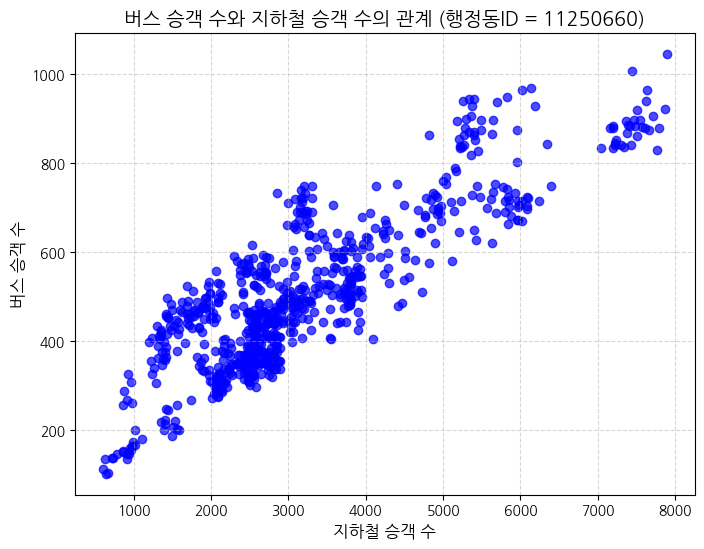

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(test_2['지하철_승객_수'], test_2['버스_승객_수'], color='blue', alpha=0.7)
plt.title('버스 승객 수와 지하철 승객 수의 관계 (행정동ID = 11250660)', fontsize=14)
plt.xlabel('지하철 승객 수', fontsize=12)
plt.ylabel('버스 승객 수', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
test_3  = traffic_df.loc[(traffic_df['행정동_ID'] == 11110530) & (traffic_df['기준_날짜'] >= '2024-12-01'), '시간':'버스_승객_수'].reset_index(drop=True)
test_3

,시간,지하철_승객_수,버스_승객_수
0,6,127.0,142.0
1,6,433.0,333.0
2,6,452.0,369.0
3,6,465.0,352.0
4,6,487.0,382.0
...,...,...,...
233,22,145.0,319.0
234,22,124.0,259.0
235,22,105.0,259.0
236,22,109.0,268.0


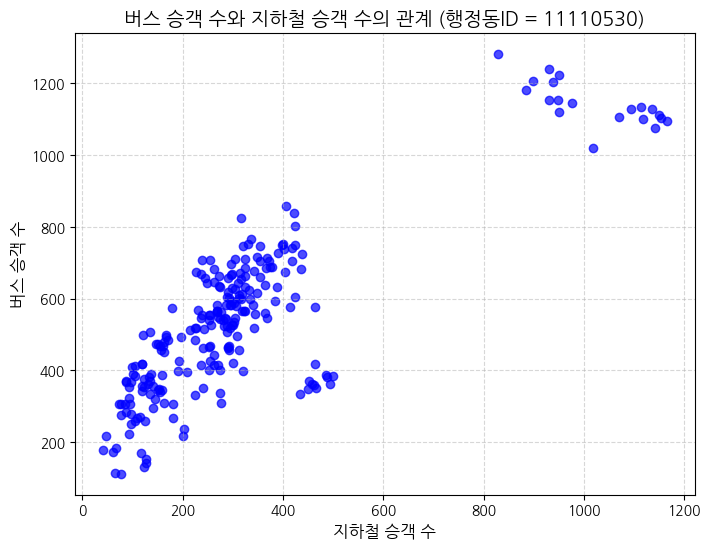

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(test_3['지하철_승객_수'], test_3['버스_승객_수'], color='blue', alpha=0.7)
plt.title('버스 승객 수와 지하철 승객 수의 관계 (행정동ID = 11110530)', fontsize=14)
plt.xlabel('지하철 승객 수', fontsize=12)
plt.ylabel('버스 승객 수', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
correlation = traffic_df['버스_승객_수'].corr(traffic_df['지하철_승객_수'])
print(f"상관계수: {correlation:.2f}")  # 음수일수록 반비례 관계

상관계수: 0.59


In [ ]:
correlation = test_2['버스_승객_수'].corr(test_2['지하철_승객_수'])
print(f"상관계수: {correlation:.2f}")  # 음수일수록 반비례 관계

상관계수: 0.86


In [ ]:
correlation = test_3['버스_승객_수'].corr(test_3['지하철_승객_수'])
print(f"상관계수: {correlation:.2f}")  # 음수일수록 반비례 관계

상관계수: 0.79


In [ ]:
traffic_df.to_csv('preprocessed/행정동, 시간대별 지하철 총 승차 승객수 정보.csv', index=False)

### EDA - 시간대별 지하철 평균 승차 정보

In [ ]:
df = pd.read_csv('서울시 행정동별 지하철 총 승차 승객수 정보.csv', encoding='cp949')
df.head()

,기준_날짜,행정동_ID,지하철_승객_수,지하철_승객_수_00시,지하철_승객_수_01시,지하철_승객_수_02시,지하철_승객_수_03시,지하철_승객_수_04시,지하철_승객_수_05시,지하철_승객_수_06시,...,지하철_승객_수_14시,지하철_승객_수_15시,지하철_승객_수_16시,지하철_승객_수_17시,지하철_승객_수_18시,지하철_승객_수_19시,지하철_승객_수_20시,지하철_승객_수_21시,지하철_승객_수_22시,지하철_승객_수_23시
0,20241206,11250770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20241206,11250760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20241206,11250740,9779.0,38.0,0.0,0.0,0.0,0.0,196.0,374.0,...,470.0,519.0,683.0,743.0,803.0,356.0,256.0,241.0,189.0,119.0
3,20241206,11250730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20241206,11250720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 누락값은 0으로 처리
df = df.fillna(0)
df

,기준_날짜,행정동_ID,지하철_승객_수,지하철_승객_수_00시,지하철_승객_수_01시,지하철_승객_수_02시,지하철_승객_수_03시,지하철_승객_수_04시,지하철_승객_수_05시,지하철_승객_수_06시,...,지하철_승객_수_14시,지하철_승객_수_15시,지하철_승객_수_16시,지하철_승객_수_17시,지하철_승객_수_18시,지하철_승객_수_19시,지하철_승객_수_20시,지하철_승객_수_21시,지하철_승객_수_22시,지하철_승객_수_23시
0,20241206,11250770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20241206,11250760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20241206,11250740,9779.0,38.0,0.0,0.0,0.0,0.0,196.0,374.0,...,470.0,519.0,683.0,743.0,803.0,356.0,256.0,241.0,189.0,119.0
3,20241206,11250730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20241206,11250720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454802,20211130,1105057,10728.0,1.0,0.0,0.0,0.0,0.0,182.0,467.0,...,432.0,394.0,562.0,662.0,762.0,422.0,281.0,300.0,150.0,30.0
454803,20211130,1101061,95603.0,4.0,0.0,0.0,0.0,18.0,279.0,355.0,...,4781.0,6015.0,7236.0,12936.0,19579.0,8734.0,6512.0,7032.0,5214.0,1713.0
454804,20211130,1114066,101870.0,11.0,0.0,0.0,0.0,20.0,934.0,2075.0,...,3973.0,4469.0,5575.0,8175.0,13185.0,8303.0,6423.0,7907.0,7051.0,2576.0
454805,20211130,1114060,21633.0,0.0,0.0,0.0,0.0,2.0,184.0,517.0,...,975.0,1161.0,1450.0,2178.0,2229.0,1194.0,954.0,939.0,777.0,222.0


In [ ]:
# 최신 데이터만 사용하여 행정동별 월 평균 지하철 이용객 수를 구함
df = df[df['기준_날짜'] >= 20241101]
df

,기준_날짜,행정동_ID,지하철_승객_수,지하철_승객_수_00시,지하철_승객_수_01시,지하철_승객_수_02시,지하철_승객_수_03시,지하철_승객_수_04시,지하철_승객_수_05시,지하철_승객_수_06시,...,지하철_승객_수_14시,지하철_승객_수_15시,지하철_승객_수_16시,지하철_승객_수_17시,지하철_승객_수_18시,지하철_승객_수_19시,지하철_승객_수_20시,지하철_승객_수_21시,지하철_승객_수_22시,지하철_승객_수_23시
0,20241206,11250770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20241206,11250760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20241206,11250740,9779.0,38.0,0.0,0.0,0.0,0.0,196.0,374.0,...,470.0,519.0,683.0,743.0,803.0,356.0,256.0,241.0,189.0,119.0
3,20241206,11250730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20241206,11250720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15295,20241101,11010570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15296,20241101,11010560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15297,20241101,11010550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15298,20241101,11010540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 새로운 데이터프레임 생성
# 시간대별 지하철 이용 수를 토대로 행정동 성격 분석
# 가설 1: 출근 시간(06-08시)에 승차 인원이 많고 퇴근 시간(17-19시)에 승차 인원이 적은 지역은 근무 지역이다.
# 가설 2: 출근 시간(06-08시)에 승차 인원이 적고 퇴근 시간(17-19시)에 승차 인원이 많은 지역은 (일반) 거주 지역이다.
# 요일(평일/주말)은 따로 고려하지 않고 월별 평균치로 대체한다.

time_df = df.iloc[:, 3:]
time_df

,지하철_승객_수_00시,지하철_승객_수_01시,지하철_승객_수_02시,지하철_승객_수_03시,지하철_승객_수_04시,지하철_승객_수_05시,지하철_승객_수_06시,지하철_승객_수_07시,지하철_승객_수_08시,지하철_승객_수_09시,...,지하철_승객_수_14시,지하철_승객_수_15시,지하철_승객_수_16시,지하철_승객_수_17시,지하철_승객_수_18시,지하철_승객_수_19시,지하철_승객_수_20시,지하철_승객_수_21시,지하철_승객_수_22시,지하철_승객_수_23시
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38.0,0.0,0.0,0.0,0.0,196.0,374.0,972.0,1195.0,575.0,...,470.0,519.0,683.0,743.0,803.0,356.0,256.0,241.0,189.0,119.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 모든 columns의 이름을 '00시' 형식으로 수정
time_df.columns = time_df.columns.map(lambda x: x.replace('지하철_승객_수_', ''))

# 데이터프레임 맨 앞에 행정동 ID, 지하철 승객 수 열 추가
time_df.insert(0, '행정동_ID', df['행정동_ID'])
time_df.insert(1, '지하철_승객_수', df['지하철_승객_수'])

time_df

,행정동_ID,지하철_승객_수,00시,01시,02시,03시,04시,05시,06시,07시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,11250770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11250760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11250740,9779.0,38.0,0.0,0.0,0.0,0.0,196.0,374.0,972.0,...,470.0,519.0,683.0,743.0,803.0,356.0,256.0,241.0,189.0,119.0
3,11250730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11250720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15295,11010570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15296,11010560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15297,11010550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15298,11010540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 행정동 ID 기준으로 모든 열을 평균치로 대체
time_df = time_df.groupby('행정동_ID').mean().round(1).reset_index()
time_df

,행정동_ID,지하철_승객_수,00시,01시,02시,03시,04시,05시,06시,07시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,11010530,62800.2,92.4,0.1,0.0,0.0,0.7,118.7,326.9,798.8,...,3686.1,4631.3,6171.8,8717.3,12137.5,4776.0,3750.8,3614.1,2211.5,783.8
1,11010540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11010550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11010560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11010570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,11250720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421,11250730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
422,11250740,8697.8,15.5,0.0,0.0,0.0,0.2,186.9,333.6,810.2,...,475.8,493.8,535.1,595.7,599.4,313.3,238.4,223.8,162.6,73.3
423,11250760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 가설 검증: 임의 행에 대해서 플롯 그리기
import matplotlib.pyplot as plt

In [ ]:
# 한글 깨짐 문제 해결
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 62.6 MB/s eta 0:00:00


In [ ]:
import koreanize_matplotlib

In [ ]:
# 대표 근무/상권 지역 예시: 강남구 역삼1동
# 행정동 id가 11230640인 행 추출
ex1 = time_df[time_df['행정동_ID'] == 11230640]

# 행정동 id 제거
ex1 = ex1.drop(columns=['행정동_ID'])
ex1

,00시,01시,02시,03시,04시,05시,06시,07시,08시,09시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
366,354.7,0.2,0.0,0.0,3.9,317.5,889.7,1975.7,2919.8,2552.8,...,4492.6,5546.2,7326.3,13134.0,15823.5,9426.2,5961.9,5725.8,4347.9,1953.0


In [ ]:
# 대표 거주 지역 예시: 강북구 미아동
# 행정동 id가 11090700인 행 추출
ex2 = time_df[time_df['행정동_ID'] == 11090700]

# 행정동 id 제거
ex2 = ex2.drop(columns=['행정동_ID'])
ex2

,00시,01시,02시,03시,04시,05시,06시,07시,08시,09시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
137,14.4,0.0,0.0,0.0,0.8,414.3,705.4,1656.3,1869.2,1195.9,...,876.9,854.8,1047.1,1068.8,1056.1,599.2,409.8,385.8,277.7,96.1


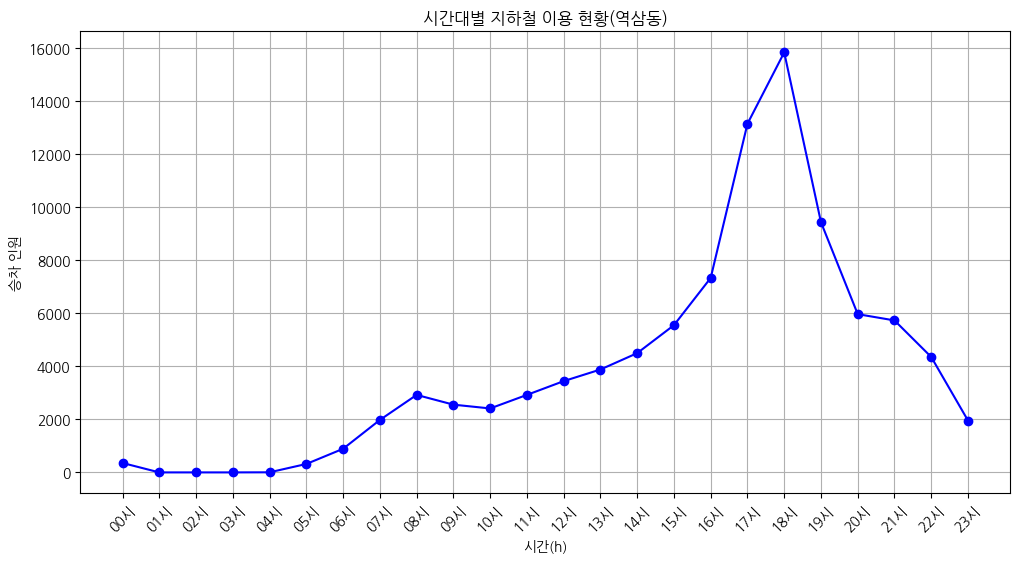

In [ ]:
# 각 column을 x축으로 한 막대그래프 그리기
# 데이터프레임의 첫 번째 행 선택
row1 = ex1.iloc[0]

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(row1.index, row1.values, marker='o', linestyle='-', color='b')

# 그래프 제목과 축 레이블 추가
plt.title('시간대별 지하철 이용 현황(역삼동)')
plt.xlabel('시간(h)')
plt.ylabel('승차 인원')

# x축 눈금 표시를 가독성 있게 설정
plt.xticks(rotation=45)

# 그리드 추가
plt.grid(True)

# 그래프 보여주기
plt.show()

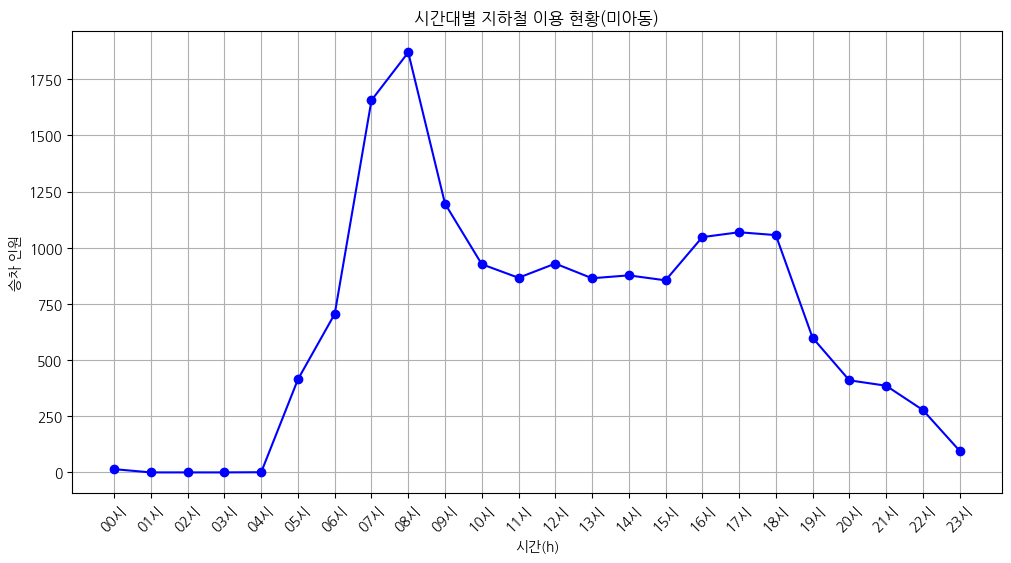

In [ ]:
# 각 column을 x축으로 한 막대그래프 그리기
# 데이터프레임의 첫 번째 행 선택
row2 = ex2.iloc[0]

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(row2.index, row2.values, marker='o', linestyle='-', color='b')

# 그래프 제목과 축 레이블 추가
plt.title('시간대별 지하철 이용 현황(미아동)')
plt.xlabel('시간(h)')
plt.ylabel('승차 인원')

# x축 눈금 표시를 가독성 있게 설정
plt.xticks(rotation=45)

# 그리드 추가
plt.grid(True)

# 그래프 보여주기
plt.show()

### 서울시 행정동별 자동차 등록대수 현황

In [ ]:
df = pd.read_csv('서울시 행정동별 자동차 등록대수 현황.csv', encoding='cp949')
df.head()

,사용본거지 시군구,읍면동 (행정동),연료,계,관용_승용,관용_승합,관용_화물,관용_특수,자가용_승용,자가용승합,자가용화물,자가용특수,영업용_승용,영업용승합,영업용화물,영업용특수
0,서울특별시 종로구,종로구 기타,휘발유,1.0,0,0,0,0,0,1,0,0,0,0,0,0
1,서울특별시 종로구,종로구 기타,휘발유,2.0,0,0,0,0,0,2,0,0,0,0,0,0
2,서울특별시 종로구,종로구 기타,휘발유,1.0,0,0,0,0,0,1,0,0,0,0,0,0
3,서울특별시 종로구,종로구 기타,경유,NaN,0,0,0,0,0,0,1,0,0,0,0,0
4,서울특별시 종로구,종로구 기타,경유,NaN,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
df = df[['읍면동 (행정동)', '계']]
df

,읍면동 (행정동),계
0,종로구 기타,1.0
1,종로구 기타,2.0
2,종로구 기타,1.0
3,종로구 기타,NaN
4,종로구 기타,NaN
...,...,...
3565,강동구 둔촌2동,377.0
3566,강동구 둔촌2동,8.0
3567,강동구 둔촌2동,12.0
3568,강동구 기타1,28.0


In [ ]:
df = df.fillna(0)
df

,읍면동 (행정동),계
0,종로구 기타,1.0
1,종로구 기타,2.0
2,종로구 기타,1.0
3,종로구 기타,0.0
4,종로구 기타,0.0
...,...,...
3565,강동구 둔촌2동,377.0
3566,강동구 둔촌2동,8.0
3567,강동구 둔촌2동,12.0
3568,강동구 기타1,28.0


In [ ]:
df = df.groupby('읍면동 (행정동)', as_index=False)['계'].sum()

df = df.rename(columns={'읍면동 (행정동)': '행정동_명칭'})
df = df.rename(columns={'계': '차량등록대수'})

df

,행정동_명칭,차량등록대수
0,강남구 개포1동,3875.0
1,강남구 개포2동,10266.0
2,강남구 개포4동,8552.0
3,강남구 기타,36.0
4,강남구 기타1,485.0
...,...,...
512,중랑구 상봉2동,5353.0
513,중랑구 신내1동,12815.0
514,중랑구 신내2동,6891.0
515,중랑구 중화1동,5571.0


In [ ]:
# 행정동 명칭에 파악할 수 없는 정보(기타) 가 포함된 경우 제거
df = df[~df['행정동_명칭'].str.contains('기타', na=False)]
df

,행정동_명칭,차량등록대수
0,강남구 개포1동,3875.0
1,강남구 개포2동,10266.0
2,강남구 개포4동,8552.0
6,강남구 논현1동,10388.0
7,강남구 논현2동,10196.0
...,...,...
512,중랑구 상봉2동,5353.0
513,중랑구 신내1동,12815.0
514,중랑구 신내2동,6891.0
515,중랑구 중화1동,5571.0


In [ ]:
# 행정구 정보를 제외하고 행정동 정보만 추출
df['행정동_명칭'] = df['행정동_명칭'].str.extract(r'(\w+동)')
df

<ipython-input-169-2ea42497cd11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['행정동_명칭'] = df['행정동_명칭'].str.extract(r'(\w+동)')


,행정동_명칭,차량등록대수
0,개포1동,3875.0
1,개포2동,10266.0
2,개포4동,8552.0
6,논현1동,10388.0
7,논현2동,10196.0
...,...,...
512,상봉2동,5353.0
513,신내1동,12815.0
514,신내2동,6891.0
515,중화1동,5571.0


In [ ]:
df.to_csv('preprocessed/자동차 등록대수 현황.csv', index=False)

### 서울시 행정동별 실시간 생활 인구 (거주인구 + 유동인구)
- 행정동별로 성별, 나이별 생활인구를 제공한다.
- 생활 인구 = 서울시와 KT가 공공빅데이터와 통신데이터를 이용하여 추계한 서울의 특정지역, 특정시점에 존재하는 모든 인구(추정치)
- 생활인구는 명 단위로 소숫점 4자리까지 표시되며, 이는 정확한 카운팅이 아닌 서울시 빅데이터와 통신사 정보 등을 통합하여 추정한 예측 인구 수치이기 때문이다.
- 생활 인구의 정의에서 거주 인구(등록 인구)보다 유동 인구의 성격을 강조하고자 한다.
- 본 분석에서는 인구 데이터를 반올림하여 정수부만 취한다.

In [ ]:
population_df = pd.read_csv('행정동 단위 서울 생활인구(내국인).csv')
population_df

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20241214,0,11110515,14474.3351,512.7066,326.6981,536.5815,372.3975,368.5338,335.0169,...,431.8745,494.3982,677.7926,714.2477,770.8644,653.7564,610.7488,494.1589,324.6671,1105.1341
1,20241214,0,11110530,11562.5839,241.4500,107.3111,171.4317,236.6460,427.6973,443.8028,...,428.0130,469.7647,596.1354,526.9855,638.2576,543.7005,500.2371,450.5194,261.3715,771.2730
2,20241214,0,11110540,3376.7464,44.6280,34.1955,258.7951,226.9578,97.2274,83.0735,...,137.3348,85.9960,145.4157,152.8090,134.2136,144.5618,117.5482,116.8971,93.0149,263.7479
3,20241214,0,11110550,12439.2424,401.6777,311.4553,385.7826,440.5775,328.2824,296.6147,...,340.0157,400.8333,474.2742,525.1538,589.4780,543.5600,562.3946,458.5845,365.5131,1076.3579
4,20241214,0,11110560,18771.5914,581.3297,420.4944,530.6232,672.0589,417.4060,320.5986,...,437.6237,438.8052,731.5395,766.8394,888.7646,883.0704,988.4705,903.6961,574.2917,1793.6853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383931,20240831,23,11740610,41288.9186,1642.6988,734.3836,856.3641,1088.8516,1533.7895,1721.0729,...,1756.6293,1673.1771,1886.4602,1583.7001,1538.4540,1475.3467,1632.8259,1680.5230,1192.3834,3064.7853
1383932,20240831,23,11740640,22838.5261,775.2296,400.3296,805.9023,471.0162,600.5071,666.1136,...,703.7548,815.9205,1122.0115,1007.5843,1087.1136,938.4919,1029.0114,793.1523,686.4998,1778.8460
1383933,20240831,23,11740620,29046.4272,897.1313,342.6772,465.0073,904.2067,1621.0933,1498.6402,...,1776.7105,1546.8037,1426.8452,1084.1697,1056.7110,939.2685,938.9407,973.9236,778.0660,2011.9885
1383934,20240831,23,11740700,25194.1495,1174.0624,592.2609,643.3010,575.9606,755.0157,771.4575,...,760.5068,764.3043,1069.0717,974.4841,1100.0503,1041.1361,1126.8341,946.8435,694.0386,1949.4065


In [ ]:
# 일부 데이터를 추출하여 플롯 그리기
# 행정동코드가 11440710인 행들을 추출하여 시간별 생활(유동)인구 변화 추이를 관찰
temp = population_df[population_df['행정동_ID'] == 11500590]
temp

,기준_날짜,시간,행정동_ID,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상)
2792,2024-12-14,6,11500590,4082.0,14548.0,5730.0,5024.0
3216,2024-12-14,7,11500590,4077.0,14197.0,5461.0,4972.0
3640,2024-12-14,8,11500590,3961.0,13487.0,5242.0,4778.0
4064,2024-12-14,9,11500590,3721.0,12558.0,4780.0,4586.0
4488,2024-12-14,10,11500590,3558.0,11784.0,4479.0,4263.0
...,...,...,...,...,...,...,...
577736,2024-10-19,18,11500590,2582.0,9517.0,4269.0,3763.0
578160,2024-10-19,19,11500590,2684.0,10060.0,4478.0,3942.0
578584,2024-10-19,20,11500590,2863.0,10778.0,4754.0,4084.0
579008,2024-10-19,21,11500590,3011.0,11517.0,5051.0,4318.0


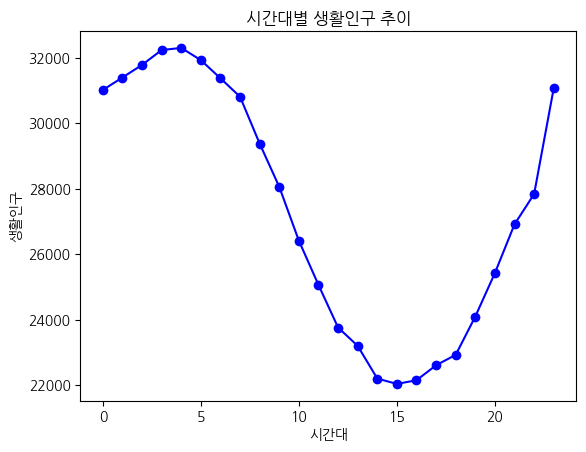

In [ ]:
# 시간대를 x축으로, 총생활인구수를 y축으로 하는 플롯 그리기
import matplotlib.pyplot as plt

plt.plot(temp['시간'], temp['총생활인구수'], marker='o', linestyle='-', color='b')
plt.title('시간대별 생활인구 추이')
plt.xlabel('시간대')
plt.ylabel('생활인구')
plt.show()

In [ ]:
# 컬럼 이름 수정
population_df.rename(columns={'기준일ID': '기준_날짜'}, inplace=True)
population_df.rename(columns={'시간대구분': '시간'}, inplace=True)
population_df.rename(columns={'행정동코드': '행정동_ID'}, inplace=True)

In [ ]:
# 날짜 형식 변경
population_df['기준_날짜'] = pd.to_datetime(population_df['기준_날짜'], format="%Y%m%d")

In [ ]:
# 필요한 데이터 크기만큼 잘라서 사용
population_df = population_df[(population_df['기준_날짜'] >= '2024-08-03') & (population_df['시간'] > 5) & (population_df['시간'] < 23)]
population_df.head()

,기준_날짜,시간,행정동_ID,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
2544,2024-12-14,6,11110515,14321.5371,504.5417,321.4953,547.5434,360.1302,348.0247,336.9537,...,426.7511,488.0000,683.9803,691.2950,762.2360,646.7990,593.3700,501.3139,321.2918,1073.6578
2545,2024-12-14,6,11110530,12401.8679,242.6828,107.8589,160.7031,199.6022,378.2742,411.7256,...,464.9256,532.3615,602.2361,567.6214,668.8768,601.3196,553.9175,524.4895,319.9066,909.7313
2546,2024-12-14,6,11110540,3697.3897,35.6381,27.3072,267.4190,238.4754,104.5654,97.1683,...,143.6306,105.9525,160.8042,159.5583,142.9719,165.5683,117.0317,129.9833,99.5161,293.6659
2547,2024-12-14,6,11110550,12539.4136,394.8830,306.1869,423.2060,483.5350,360.1764,296.5996,...,345.6275,388.1089,439.6562,563.5707,561.4349,494.7658,559.4161,472.6713,384.6547,1040.2928
2548,2024-12-14,6,11110560,19397.0604,587.5392,424.9862,531.7747,643.5942,458.6562,359.5880,...,438.2642,474.1268,735.9096,771.4819,944.1993,905.0798,1023.1665,915.3684,579.8411,1834.7702


In [ ]:
population_df.shape

(965872, 32)

In [ ]:
# 생활인구수 컬럼을 다음과 같이 수정 -> 0세부터24세_생활인구수, 25세부터49세_생활인구수, 50세부터64세_생활인구수, 65세이상_생활인구수
# 남자와 여자로 구분된 것을 하나로 합친다.

# 새로운 df 생성
age_df = population_df[['기준_날짜', '시간', '행정동_ID']]

# 연령대 그룹 정의 (학생, 직장인, 중장년층, 노년층)
age_groups = {
    "학생_생활인구수(10세-24세)": [
        '남자10세부터14세생활인구수', '남자15세부터19세생활인구수', '남자20세부터24세생활인구수',
        '여자10세부터14세생활인구수', '여자15세부터19세생활인구수', '여자20세부터24세생활인구수'
    ],
    "직장인_생활인구수(25세-49세)": [
        '남자25세부터29세생활인구수', '남자30세부터34세생활인구수', '남자35세부터39세생활인구수', '남자40세부터44세생활인구수', '남자45세부터49세생활인구수',
        '여자25세부터29세생활인구수', '여자30세부터34세생활인구수', '여자35세부터39세생활인구수', '여자40세부터44세생활인구수', '여자45세부터49세생활인구수'
    ],
    "중장년층_생활인구수(50세-64세)": [
        '남자50세부터54세생활인구수', '남자55세부터59세생활인구수', '남자60세부터64세생활인구수',
        '여자50세부터54세생활인구수', '여자55세부터59세생활인구수', '여자60세부터64세생활인구수'
    ],
    "노년층_생활인구수(65세이상)": [
        '남자65세부터69세생활인구수', '남자70세이상생활인구수',
        '여자65세부터69세생활인구수', '여자70세이상생활인구수'
    ]
}

# 연령대별 새로운 컬럼 생성
for group_name, group_cols in age_groups.items():
    age_df[group_name] = population_df[group_cols].sum(axis=1).round(0)

age_df

<ipython-input-204-dc6bd3745a07>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df[group_name] = population_df[group_cols].sum(axis=1).round(0)
<ipython-input-204-dc6bd3745a07>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df[group_name] = population_df[group_cols].sum(axis=1).round(0)
<ipython-input-204-dc6bd3745a07>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,기준_날짜,시간,행정동_ID,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상)
2544,2024-12-14,6,11110515,2468.0,5320.0,3078.0,2216.0
2545,2024-12-14,6,11110530,1190.0,5301.0,3194.0,2160.0
2546,2024-12-14,6,11110540,748.0,1385.0,772.0,676.0
2547,2024-12-14,6,11110550,2273.0,4217.0,2901.0,2350.0
2548,2024-12-14,6,11110560,3033.0,6122.0,5036.0,3817.0
...,...,...,...,...,...,...,...
1383507,2024-08-31,22,11740610,5609.0,18705.0,10183.0,7980.0
1383508,2024-08-31,22,11740700,3647.0,9204.0,5865.0,4958.0
1383509,2024-08-31,22,11740685,7224.0,23261.0,13345.0,10946.0
1383510,2024-08-31,22,11740660,4013.0,11205.0,6312.0,4604.0


### 데이터 전처리 - 행정동 ID 수정
현 데이터프레임을 '생활인구_행정동_명칭' 데이터와 행정동코드로 조인하여 행정동 명칭 추가

In [ ]:
# 행정동 ID 수정
# 현 데이터프레임을 '생활인구_행정동_명칭' 데이터와 행정동코드로 조인하여 행정동 명칭 추가
code = pd.read_csv('생활인구_행정동_명칭.csv')
code

,행정동코드,행정동_명칭
0,11110000,종로구
1,11110515,청운효자동
2,11110530,사직동
3,11110540,삼청동
4,11110550,부암동
...,...,...
936,11740106,둔촌동
937,11740107,암사동
938,11740108,성내동
939,11740109,천호동


In [ ]:
code = code.rename(columns={'행정동코드': '행정동_ID'})
code

,행정동_ID,행정동_명칭
0,11110000,종로구
1,11110515,청운효자동
2,11110530,사직동
3,11110540,삼청동
4,11110550,부암동
...,...,...
936,11740106,둔촌동
937,11740107,암사동
938,11740108,성내동
939,11740109,천호동


In [ ]:
# 행정동코드 기준으로 조인
age_df = pd.merge(age_df, code, on='행정동_ID', how='left')
age_df

,기준_날짜,시간,행정동_ID,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상),행정동_명칭
0,2024-12-14,6,11110515,2468.0,5320.0,3078.0,2216.0,청운효자동
1,2024-12-14,6,11110530,1190.0,5301.0,3194.0,2160.0,사직동
2,2024-12-14,6,11110540,748.0,1385.0,772.0,676.0,삼청동
3,2024-12-14,6,11110550,2273.0,4217.0,2901.0,2350.0,부암동
4,2024-12-14,6,11110560,3033.0,6122.0,5036.0,3817.0,평창동
...,...,...,...,...,...,...,...,...
965867,2024-08-31,22,11740610,5609.0,18705.0,10183.0,7980.0,천호제2동
965868,2024-08-31,22,11740700,3647.0,9204.0,5865.0,4958.0,둔촌제2동
965869,2024-08-31,22,11740685,7224.0,23261.0,13345.0,10946.0,길동
965870,2024-08-31,22,11740660,4013.0,11205.0,6312.0,4604.0,성내제3동


In [ ]:
age_df[age_df.isnull().any(axis=1)]

,기준_날짜,시간,행정동_ID,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상),행정동_명칭
399,2024-12-14,6,11710647,8569.0,19342.0,8493.0,4540.0,NaN
823,2024-12-14,7,11710647,8516.0,19106.0,8294.0,4517.0,NaN
1247,2024-12-14,8,11710647,8259.0,18672.0,8128.0,4377.0,NaN
1671,2024-12-14,9,11710647,8416.0,18596.0,7727.0,4333.0,NaN
2095,2024-12-14,10,11710647,8175.0,17531.0,7598.0,4138.0,NaN
...,...,...,...,...,...,...,...,...
964148,2024-08-31,18,11710647,7432.0,16334.0,7322.0,4103.0,NaN
964556,2024-08-31,19,11710647,7544.0,16744.0,7615.0,4236.0,NaN
964994,2024-08-31,20,11710647,7522.0,17284.0,7892.0,4287.0,NaN
965419,2024-08-31,21,11710647,7682.0,17823.0,8129.0,4365.0,NaN


In [ ]:
# 행정동id가 11710647인 행의 행정동 명칭을 '위례동'으로 설정
age_df.loc[age_df['행정동_ID'] == 11710647, '행정동_명칭'] = '위례동'
age_df[age_df.isnull().any(axis=1)]

,기준_날짜,시간,행정동_ID,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상),행정동_명칭


In [ ]:
# 불필요한 컬럼 제거
age_df = age_df.drop(columns=['행정동_ID']).reset_index(drop=True)

# 마지막 컬럼 위치를 3번째로 바꿈
cols = list(age_df.columns)
cols.insert(2, cols.pop())

age_df = age_df[cols]
age_df

,기준_날짜,시간,행정동_명칭,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상)
0,2024-12-14,6,청운효자동,2468.0,5320.0,3078.0,2216.0
1,2024-12-14,6,사직동,1190.0,5301.0,3194.0,2160.0
2,2024-12-14,6,삼청동,748.0,1385.0,772.0,676.0
3,2024-12-14,6,부암동,2273.0,4217.0,2901.0,2350.0
4,2024-12-14,6,평창동,3033.0,6122.0,5036.0,3817.0
...,...,...,...,...,...,...,...
965867,2024-08-31,22,천호제2동,5609.0,18705.0,10183.0,7980.0
965868,2024-08-31,22,둔촌제2동,3647.0,9204.0,5865.0,4958.0
965869,2024-08-31,22,길동,7224.0,23261.0,13345.0,10946.0
965870,2024-08-31,22,성내제3동,4013.0,11205.0,6312.0,4604.0


In [ ]:
# csv 파일로 저장
age_df.to_csv('preprocessed/서울시 생활인구.csv', index=False)

##3. 전체 데이터 조인 (key = 행정동_ID)
featue로 사용할 데이터들을 모두 모아 하나의 csv 파일로 저장한다.

In [ ]:
# 조인할 데이터프레임 불러오기
# 1. 행정동별 시간대별 지하철/버스 승객 정보
passenger_df = pd.read_csv('preprocessed/행정동, 시간대별 지하철 총 승차 승객수 정보.csv')
passenger_df.head()

,기준_날짜,행정동_ID,시간,지하철_승객_수,버스_승객_수,주말여부
0,2024-12-14,11250740,6,180.0,59.0,1
1,2024-12-14,11250710,6,159.0,98.0,1
2,2024-12-14,11250700,6,164.0,23.0,1
3,2024-12-14,11250660,6,866.0,152.0,1
4,2024-12-14,11250650,6,177.0,75.0,1


In [ ]:
# 2. 행정동 ID 매핑 정보
dongID_df = pd.read_csv('preprocessed/서울시 읍면동마스터 정보.csv')
dongID_df.head()

,행정동_ID,행정동_명칭,자치구_명칭
0,11250770,상일2동,강동구
1,11250760,상일1동,강동구
2,11250740,길동,강동구
3,11250730,천호2동,강동구
4,11250720,암사1동,강동구


In [ ]:
# 3. 행정동별 자차 이용 인원 정보
vehicle_df = pd.read_csv('preprocessed/자동차 등록대수 현황.csv')
vehicle_df.head()

,행정동_명칭,차량등록대수
0,개포1동,3875.0
1,개포2동,10266.0
2,개포4동,8552.0
3,논현1동,10388.0
4,논현2동,10196.0


In [ ]:
# 4. 행정동별 시간대별 생활 인구
people_df = pd.read_csv('preprocessed/서울시 생활인구.csv')
people_df.head()

,기준_날짜,시간,행정동_명칭,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상)
0,2024-12-14,6,청운효자동,2468.0,5320.0,3078.0,2216.0
1,2024-12-14,6,사직동,1190.0,5301.0,3194.0,2160.0
2,2024-12-14,6,삼청동,748.0,1385.0,772.0,676.0
3,2024-12-14,6,부암동,2273.0,4217.0,2901.0,2350.0
4,2024-12-14,6,평창동,3033.0,6122.0,5036.0,3817.0


In [ ]:
# 5. 행정동별 24년도 하반기 상권 변화 지표
market_df = pd.read_csv('preprocessed/서울시 상권변화지표.csv')
market_df.head()

,행정동_ID,행정동_명칭,상권_변화_지표
0,11110540,삼청동,3
1,11110550,부암동,3
2,11110560,평창동,2
3,11110570,무악동,2
4,11110580,교남동,2


In [ ]:
# 6. 자치구별 대학교 개황
univ_df = pd.read_csv('preprocessed/행정구역별 대학교 개황.csv')
univ_df.head()

,행정구역,학교수
0,종로구,8
1,중구,3
2,용산구,3
3,성동구,3
4,광진구,4


### 추가 전처리
지하철 승차 인원 데이터에 행정동명칭, 자치구명칭 컬럼 추가

In [ ]:
passenger_df = pd.merge(passenger_df, dongID_df, on='행정동_ID', how='left')
passenger_df.head()

,기준_날짜,행정동_ID,시간,지하철_승객_수,버스_승객_수,주말여부,행정동_명칭,자치구_명칭
0,2024-12-14,11250740,6,180.0,59.0,1,길동,강동구
1,2024-12-14,11250710,6,159.0,98.0,1,둔촌2동,강동구
2,2024-12-14,11250700,6,164.0,23.0,1,둔촌1동,강동구
3,2024-12-14,11250660,6,866.0,152.0,1,성내2동,강동구
4,2024-12-14,11250650,6,177.0,75.0,1,성내1동,강동구


In [ ]:
# 누락값 체크
passenger_df[passenger_df.isnull().any(axis=1)]

,기준_날짜,행정동_ID,시간,지하철_승객_수,버스_승객_수,주말여부,행정동_명칭,자치구_명칭


### 추가 전처리
- 서울시 생활인구 행정동 명칭과 읍면동 마스터 행정동 명칭을 비교하여 형식 맞추기
- 생활인구 데이터에서 지하철 승차 인원 정보에 포함되지 않는 행정동은 제거

In [ ]:
# 행정동 명칭 컬럼만 뽑아서 오름차순 정렬
main_dong = dongID_df['행정동_명칭'].sort_values().unique()
sub_dong = people_df['행정동_명칭'].sort_values().unique()

print(len(main_dong), len(sub_dong))

424 423


In [ ]:
people_df['행정동_명칭'] = people_df['행정동_명칭'].str.replace("제", "", regex=False).replace('기동', '제기동', regex=False)
sub_dong = people_df['행정동_명칭'].sort_values().unique()

In [ ]:
# people_df의 행정동 명칭에서 '숫자.숫자' 형태를 '숫자,숫자' 형태로 수정
people_df['행정동_명칭'] = people_df['행정동_명칭'].apply(lambda x: x.replace('.', ','))
sub_dong = people_df['행정동_명칭'].sort_values().unique()

In [ ]:
# 지하철 정보가 있는 행정동
subway_dong = passenger_df['행정동_명칭'].unique()
print(len(subway_dong))

223


In [ ]:
# 지하철 승차 인원 정보에 포함되지 않는 행정동 -> 홍제1동
for d in subway_dong:
    if d not in sub_dong:
        print(d)

In [ ]:
people_df['행정동_명칭'] = people_df['행정동_명칭'].str.replace("홍1동", "홍제1동", regex=False)
sub_dong = people_df['행정동_명칭'].sort_values().unique()

In [ ]:
for d in subway_dong:
    if d not in sub_dong:
        print(d)

In [ ]:
# 생활인구 데이터셋에서 subway_dong에 포함되지 않는 행정동 제거
people_df = people_df[people_df['행정동_명칭'].isin(subway_dong)]
people_df

,기준_날짜,시간,행정동_명칭,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상)
1,2024-12-14,6,사직동,1190.0,5301.0,3194.0,2160.0
8,2024-12-14,6,"종로1,2,3,4가동",3240.0,13209.0,6726.0,4038.0
9,2024-12-14,6,"종로5,6가동",1431.0,3024.0,2063.0,1376.0
10,2024-12-14,6,이화동,3249.0,8257.0,3677.0,2436.0
14,2024-12-14,6,창신3동,878.0,2428.0,1421.0,1029.0
...,...,...,...,...,...,...,...
965864,2024-08-31,22,성내2동,3053.0,11017.0,5380.0,4167.0
965865,2024-08-31,22,성내1동,3166.0,8679.0,4912.0,4045.0
965868,2024-08-31,22,둔촌2동,3647.0,9204.0,5865.0,4958.0
965869,2024-08-31,22,길동,7224.0,23261.0,13345.0,10946.0


In [ ]:
# 행정동명칭 재점검
sub_dong = people_df['행정동_명칭'].unique()

# sub_dong 데이터 중 subway_dong에 포함되지 않는 데이터가 있는가
for d in sub_dong:
    if d not in subway_dong:
        print(d)

# sub_dong 데이터 중 main_dong에 포함되지 않는 데이터가 있는가
for d in sub_dong:
    if d not in main_dong:
        print(d)

### 추가 전처리
상권지표 데이터셋 행정동 명칭 수정

In [ ]:
market_dong = market_df['행정동_명칭'].unique()
market_dong

for d in sub_dong:
    if d not in market_dong:
        print(d)

종로1,2,3,4가동
종로5,6가동
면목3,8동
중계2,3동
상계3,4동


In [ ]:
market_df['행정동_명칭'] = market_df['행정동_명칭'].apply(lambda x: x.replace('?', ','))
market_dong = market_df['행정동_명칭'].unique()

In [ ]:
for d in sub_dong:
    if d not in market_dong:
        print(d)

In [ ]:
# 행정동 ID 컬럼 제거
market_df = market_df.drop(columns=['행정동_ID'])
market_df

,행정동_명칭,상권_변화_지표
0,삼청동,3
1,부암동,3
2,평창동,2
3,무악동,2
4,교남동,2
...,...,...
420,둔촌2동,1
421,성내1동,1
422,성내2동,4
423,성내3동,1


### 추가 전처리
차량 등록 정보 행정동 명칭 수정

In [ ]:
veh_dong = vehicle_df['행정동_명칭'].unique()
print(len(veh_dong))

410


In [ ]:
# 행정동 차량 등록 정보 -> 매핑이 어려운 케이스가 다수 포진(전체의 약 1/2) => 분석이 어려움
sum = 0
for d in veh_dong:
    if d not in subway_dong:
        sum += 1

print(sum)

# 410개 중 215개가 매핑 불가로, 해당 데이터셋은 폐기 결정

215


### 데이터 조인

In [ ]:
all_df = pd.DataFrame()

1. [날짜, 시간, 행정동명칭]을 기준으로 지하철 승차 인원 데이터셋과 생활인구 데이터셋을 조인

In [ ]:
# 1. [날짜, 시간, 행정동명칭]을 기준으로 passenger 데이터프레임과 people 데이터프레임을 조인
all_df = pd.merge(passenger_df, people_df, on=['기준_날짜', '시간', '행정동_명칭'], how='left')
all_df.head()

,기준_날짜,행정동_ID,시간,지하철_승객_수,버스_승객_수,주말여부,행정동_명칭,자치구_명칭,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상)
0,2024-12-14,11250740,6,180.0,59.0,1,길동,강동구,7685.0,24507.0,14117.0,11459.0
1,2024-12-14,11250710,6,159.0,98.0,1,둔촌2동,강동구,3960.0,10190.0,5952.0,5175.0
2,2024-12-14,11250700,6,164.0,23.0,1,둔촌1동,강동구,1574.0,4335.0,2728.0,2107.0
3,2024-12-14,11250660,6,866.0,152.0,1,성내2동,강동구,3194.0,11341.0,5506.0,4411.0
4,2024-12-14,11250650,6,177.0,75.0,1,성내1동,강동구,3342.0,9419.0,5121.0,4298.0


In [ ]:
# 누락값 체크
all_df[all_df.isnull().any(axis=1)]

,기준_날짜,행정동_ID,시간,지하철_승객_수,버스_승객_수,주말여부,행정동_명칭,자치구_명칭,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상)


2. [행정동 명칭]을 기준으로 전체 데이터셋과 상권변화지표 데이터셋을 조인

In [ ]:
# 2. [행정동 명칭]을 기준으로 all_df와 market_df를 조인
all_df = pd.merge(all_df, market_df, on='행정동_명칭', how='left')
all_df.head()

,기준_날짜,행정동_ID,시간,지하철_승객_수,버스_승객_수,주말여부,행정동_명칭,자치구_명칭,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상),상권_변화_지표_x,상권_변화_지표_y
0,2024-12-14,11250740,6,180.0,59.0,1,길동,강동구,7685.0,24507.0,14117.0,11459.0,NaN,4
1,2024-12-14,11250710,6,159.0,98.0,1,둔촌2동,강동구,3960.0,10190.0,5952.0,5175.0,NaN,1
2,2024-12-14,11250700,6,164.0,23.0,1,둔촌1동,강동구,1574.0,4335.0,2728.0,2107.0,NaN,2
3,2024-12-14,11250660,6,866.0,152.0,1,성내2동,강동구,3194.0,11341.0,5506.0,4411.0,NaN,4
4,2024-12-14,11250650,6,177.0,75.0,1,성내1동,강동구,3342.0,9419.0,5121.0,4298.0,NaN,1


In [ ]:
# 불필요한 컬럼 삭제
all_df = all_df.drop(columns=['상권_변화_지표_x'])

# 컬럼 이름 변경
all_df = all_df.rename(columns={'상권_변화_지표_y': '상권_변화_지표'})
all_df.head()

,기준_날짜,행정동_ID,시간,지하철_승객_수,버스_승객_수,주말여부,행정동_명칭,자치구_명칭,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상),상권_변화_지표
0,2024-12-14,11250740,6,180.0,59.0,1,길동,강동구,7685.0,24507.0,14117.0,11459.0,4
1,2024-12-14,11250710,6,159.0,98.0,1,둔촌2동,강동구,3960.0,10190.0,5952.0,5175.0,1
2,2024-12-14,11250700,6,164.0,23.0,1,둔촌1동,강동구,1574.0,4335.0,2728.0,2107.0,2
3,2024-12-14,11250660,6,866.0,152.0,1,성내2동,강동구,3194.0,11341.0,5506.0,4411.0,4
4,2024-12-14,11250650,6,177.0,75.0,1,성내1동,강동구,3342.0,9419.0,5121.0,4298.0,1


In [ ]:
# 누락값 체크
all_df[all_df.isnull().any(axis=1)]

,기준_날짜,행정동_ID,시간,지하철_승객_수,버스_승객_수,주말여부,행정동_명칭,자치구_명칭,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상),상권_변화_지표


3. [자치구 명칭]을 기준으로 전체 데이터셋과 대학교 개황을 조인

In [ ]:
# 3. 자치구 명칭을 기준으로 all_df와 univ_df를 조인
univ_df = univ_df.rename(columns={'행정구역': '자치구_명칭'})

all_df = pd.merge(all_df, univ_df, on='자치구_명칭', how='left')

all_df.head()

,기준_날짜,행정동_ID,시간,지하철_승객_수,버스_승객_수,주말여부,행정동_명칭,자치구_명칭,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상),상권_변화_지표,학교수
0,2024-12-14,11250740,6,180.0,59.0,1,길동,강동구,7685.0,24507.0,14117.0,11459.0,4,1
1,2024-12-14,11250710,6,159.0,98.0,1,둔촌2동,강동구,3960.0,10190.0,5952.0,5175.0,1,1
2,2024-12-14,11250700,6,164.0,23.0,1,둔촌1동,강동구,1574.0,4335.0,2728.0,2107.0,2,1
3,2024-12-14,11250660,6,866.0,152.0,1,성내2동,강동구,3194.0,11341.0,5506.0,4411.0,4,1
4,2024-12-14,11250650,6,177.0,75.0,1,성내1동,강동구,3342.0,9419.0,5121.0,4298.0,1,1


In [ ]:
# 누락값 체크
all_df[all_df.isnull().any(axis=1)]

,기준_날짜,행정동_ID,시간,지하철_승객_수,버스_승객_수,주말여부,행정동_명칭,자치구_명칭,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상),상권_변화_지표,학교수


In [ ]:
print(all_df.shape)
all_df.head()

(514709, 14)


,기준_날짜,행정동_ID,시간,지하철_승객_수,버스_승객_수,주말여부,행정동_명칭,자치구_명칭,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상),상권_변화_지표,학교수
0,2024-12-14,11250740,6,180.0,59.0,1,길동,강동구,7685.0,24507.0,14117.0,11459.0,4,1
1,2024-12-14,11250710,6,159.0,98.0,1,둔촌2동,강동구,3960.0,10190.0,5952.0,5175.0,1,1
2,2024-12-14,11250700,6,164.0,23.0,1,둔촌1동,강동구,1574.0,4335.0,2728.0,2107.0,2,1
3,2024-12-14,11250660,6,866.0,152.0,1,성내2동,강동구,3194.0,11341.0,5506.0,4411.0,4,1
4,2024-12-14,11250650,6,177.0,75.0,1,성내1동,강동구,3342.0,9419.0,5121.0,4298.0,1,1


In [ ]:
# 자치구 명칭 컬럼을 2번째 순서로 이동
cols = list(all_df.columns)
cols.insert(1, cols.pop(4))

all_df = all_df[cols]
all_df.head()

,기준_날짜,자치구_명칭,행정동_ID,시간,행정동_명칭,학교수,지하철_승객_수,버스_승객_수,주말여부,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상),상권_변화_지표
0,2024-12-14,강동구,11250740,6,길동,1,180.0,59.0,1,7685.0,24507.0,14117.0,11459.0,4
1,2024-12-14,강동구,11250710,6,둔촌2동,1,159.0,98.0,1,3960.0,10190.0,5952.0,5175.0,1
2,2024-12-14,강동구,11250700,6,둔촌1동,1,164.0,23.0,1,1574.0,4335.0,2728.0,2107.0,2
3,2024-12-14,강동구,11250660,6,성내2동,1,866.0,152.0,1,3194.0,11341.0,5506.0,4411.0,4
4,2024-12-14,강동구,11250650,6,성내1동,1,177.0,75.0,1,3342.0,9419.0,5121.0,4298.0,1


In [ ]:
# 행정동 명칭 컬럼을 3번째 순서로 이동
cols = list(all_df.columns)
cols.insert(2, cols.pop(4))

all_df = all_df[cols]
all_df.head()

,기준_날짜,자치구_명칭,행정동_명칭,행정동_ID,시간,학교수,지하철_승객_수,버스_승객_수,주말여부,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상),상권_변화_지표
0,2024-12-14,강동구,길동,11250740,6,1,180.0,59.0,1,7685.0,24507.0,14117.0,11459.0,4
1,2024-12-14,강동구,둔촌2동,11250710,6,1,159.0,98.0,1,3960.0,10190.0,5952.0,5175.0,1
2,2024-12-14,강동구,둔촌1동,11250700,6,1,164.0,23.0,1,1574.0,4335.0,2728.0,2107.0,2
3,2024-12-14,강동구,성내2동,11250660,6,1,866.0,152.0,1,3194.0,11341.0,5506.0,4411.0,4
4,2024-12-14,강동구,성내1동,11250650,6,1,177.0,75.0,1,3342.0,9419.0,5121.0,4298.0,1


In [ ]:
# 학교 수 컬럼을 뒤 순서로 이동
cols = list(all_df.columns)
cols.insert(-1, cols.pop(5))

all_df = all_df[cols]
all_df.head()

,기준_날짜,자치구_명칭,행정동_명칭,행정동_ID,시간,지하철_승객_수,버스_승객_수,주말여부,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상),학교수,상권_변화_지표
0,2024-12-14,강동구,길동,11250740,6,180.0,59.0,1,7685.0,24507.0,14117.0,11459.0,1,4
1,2024-12-14,강동구,둔촌2동,11250710,6,159.0,98.0,1,3960.0,10190.0,5952.0,5175.0,1,1
2,2024-12-14,강동구,둔촌1동,11250700,6,164.0,23.0,1,1574.0,4335.0,2728.0,2107.0,1,2
3,2024-12-14,강동구,성내2동,11250660,6,866.0,152.0,1,3194.0,11341.0,5506.0,4411.0,1,4
4,2024-12-14,강동구,성내1동,11250650,6,177.0,75.0,1,3342.0,9419.0,5121.0,4298.0,1,1


In [ ]:
all_df.to_csv('통합 학습 데이터셋.csv', index=False)

### 추가 EDA
- 상권 변화 지표와 지하철 승객 수 간 상관관계를 파악한다.
- 자치구 대학교 수와 지하철 승객 수 간 상관관계를 파악한다.

In [ ]:
# all_df의 학교 수와 지하철 승객 수로 막대 그래프 그리기
test = all_df[all_df['기준_날짜'] > '2024-11-01'].reset_index(drop=True)
test.head()

,기준_날짜,자치구_명칭,행정동_명칭,행정동_ID,시간,지하철_승객_수,버스_승객_수,주말여부,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상),학교수,상권_변화_지표
0,2024-12-14,강동구,길동,11250740,6,180.0,59.0,1,7685.0,24507.0,14117.0,11459.0,1,4
1,2024-12-14,강동구,둔촌2동,11250710,6,159.0,98.0,1,3960.0,10190.0,5952.0,5175.0,1,1
2,2024-12-14,강동구,둔촌1동,11250700,6,164.0,23.0,1,1574.0,4335.0,2728.0,2107.0,1,2
3,2024-12-14,강동구,성내2동,11250660,6,866.0,152.0,1,3194.0,11341.0,5506.0,4411.0,1,4
4,2024-12-14,강동구,성내1동,11250650,6,177.0,75.0,1,3342.0,9419.0,5121.0,4298.0,1,1


In [ ]:
test['총인구수'] = test['학생_생활인구수(10세-24세)'] + test['직장인_생활인구수(25세-49세)'] + test['중장년층_생활인구수(50세-64세)'] + test['노년층_생활인구수(65세이상)']
test.head()

,기준_날짜,자치구_명칭,행정동_명칭,행정동_ID,시간,지하철_승객_수,버스_승객_수,주말여부,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상),학교수,상권_변화_지표,총인구수
0,2024-12-14,강동구,길동,11250740,6,180.0,59.0,1,7685.0,24507.0,14117.0,11459.0,1,4,57768.0
1,2024-12-14,강동구,둔촌2동,11250710,6,159.0,98.0,1,3960.0,10190.0,5952.0,5175.0,1,1,25277.0
2,2024-12-14,강동구,둔촌1동,11250700,6,164.0,23.0,1,1574.0,4335.0,2728.0,2107.0,1,2,10744.0
3,2024-12-14,강동구,성내2동,11250660,6,866.0,152.0,1,3194.0,11341.0,5506.0,4411.0,1,4,24452.0
4,2024-12-14,강동구,성내1동,11250650,6,177.0,75.0,1,3342.0,9419.0,5121.0,4298.0,1,1,22180.0


In [ ]:
test['지하철_승객_수'] = test['지하철_승객_수'] / test['총인구수']
test.head()

,기준_날짜,자치구_명칭,행정동_명칭,행정동_ID,시간,지하철_승객_수,버스_승객_수,주말여부,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상),학교수,상권_변화_지표,총인구수
0,2024-12-14,강동구,길동,11250740,6,0.003116,59.0,1,7685.0,24507.0,14117.0,11459.0,1,4,57768.0
1,2024-12-14,강동구,둔촌2동,11250710,6,0.006290,98.0,1,3960.0,10190.0,5952.0,5175.0,1,1,25277.0
2,2024-12-14,강동구,둔촌1동,11250700,6,0.015264,23.0,1,1574.0,4335.0,2728.0,2107.0,1,2,10744.0
3,2024-12-14,강동구,성내2동,11250660,6,0.035416,152.0,1,3194.0,11341.0,5506.0,4411.0,1,4,24452.0
4,2024-12-14,강동구,성내1동,11250650,6,0.007980,75.0,1,3342.0,9419.0,5121.0,4298.0,1,1,22180.0


In [ ]:
univ_test = test[['지하철_승객_수', '학교수']]
univ_test.head()

,지하철_승객_수,학교수
0,0.003116,1
1,0.006290,1
2,0.015264,1
3,0.035416,1
4,0.007980,1


In [ ]:
# test의 학교 수를 기준으로 그룹핑하고 평균 계산
univ_test = univ_test.groupby('학교수').mean().reset_index()
univ_test

,학교수,지하철_승객_수
0,-,0.039459
1,1,0.047011
2,2,0.040994
3,3,0.056757
4,4,0.050188
5,5,0.042676
6,6,0.043148
7,7,0.038531
8,8,0.059861


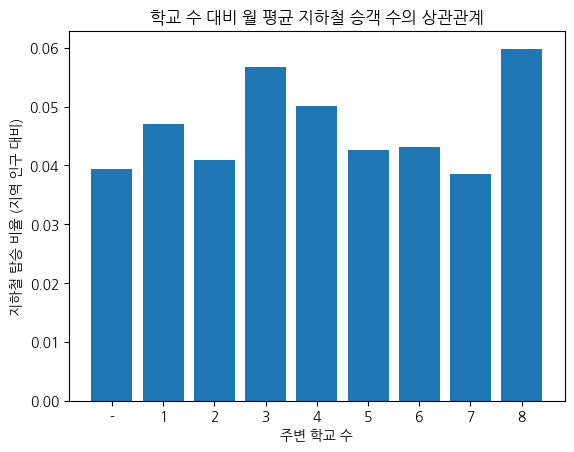

In [ ]:
# 막대 그래프 그리기
plt.bar(univ_test['학교수'], univ_test['지하철_승객_수'])

# 그래프 제목 및 라벨 추가
plt.title('학교 수 대비 월 평균 지하철 승객 수의 상관관계')
plt.xlabel('주변 학교 수')
plt.ylabel('지하철 탑승 비율 (지역 인구 대비)')

# 그래프 보여주기
plt.show()

In [ ]:
market_test = test.loc[test['기준_날짜'] == '2024-12-14', ['시간', '지하철_승객_수', '상권_변화_지표']]
market_test.head()

,시간,지하철_승객_수,상권_변화_지표
0,6,0.003116,4
1,6,0.006290,1
2,6,0.015264,2
3,6,0.035416,4
4,6,0.007980,1


In [ ]:
# 상권 변화 지표 데이터 수정 ex) 1 -> 상권 정체
market_test['상권_변화_지표'] = market_test['상권_변화_지표'].replace({4: '다이나믹', 3: '상권확장', 2: '정체', 1: '상권축소'}) # 상권 점수 부여

In [ ]:
# 상권변화지표가 1인 데이터 (상권축소)
market_L = market_test[market_test['상권_변화_지표'] == '상권축소']

# 시간을 기준으로 그룹핑하여 지하철 승객 수의 평균을 구함
market_L_mean = market_L.groupby('시간').mean('지하철_승객_수').reset_index()

market_L_mean

,시간,지하철_승객_수
0,6,0.011208
1,7,0.016676
2,8,0.028560
3,9,0.034777
4,10,0.038358
5,11,0.042979
6,12,0.047373
7,13,0.051042
8,14,0.052597
9,15,0.049972


In [ ]:
# 상권변화지표가 3인 데이터 (상권확장)
market_H = market_test[market_test['상권_변화_지표'] == '상권확장']

# 시간을 기준으로 그룹핑하여 지하철 승객 수의 평균을 구함
market_H_mean = market_H.groupby('시간').mean('지하철_승객_수').reset_index()

market_H_mean

,시간,지하철_승객_수
0,6,0.012245
1,7,0.019006
2,8,0.031623
3,9,0.038777
4,10,0.043178
5,11,0.049016
6,12,0.053785
7,13,0.056866
8,14,0.057877
9,15,0.059935


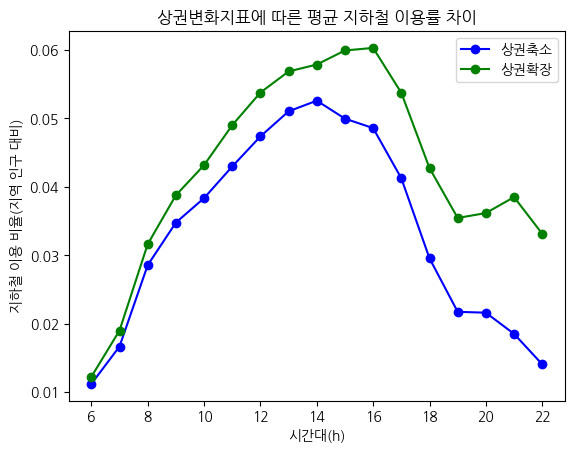

In [ ]:
# 인덱스를 x축으로 설정하고 선 그래프 그리기
plt.plot(market_L_mean['시간'], market_L_mean['지하철_승객_수'], marker='o', color='blue', label='상권축소')
plt.plot(market_H_mean['시간'], market_H_mean['지하철_승객_수'], marker='o', color='green', label='상권확장')

# 그래프 제목 및 레이블 설정
plt.title("상권변화지표에 따른 평균 지하철 이용률 차이")
plt.xlabel("시간대(h)")
plt.ylabel("지하철 이용 비율(지역 인구 대비)")

# 그래프 표시
plt.legend()
plt.show()

## 4. 회귀 분석 모델 학습

아래 경우의 수를 실험해본 후 가장 성능이 좋은 케이스를 찾는다.
- 회귀 모델 (선형/비선형)
  1. Linear Regressor
  1. Random Forest Regressor
  2. Gradient Boosting Regressor

- 학습 데이터
  1. raw data를 그대로 학습에 사용
  2. 인원 데이터를 스케일링하여 전체 인구 대비 비율로 변환한 후 학습에 사용

MAE, MSE, R² 성능 평가 지표를 통해 모델 성능을 평가한다.
- MAE (Mean Absolute Error): 예측값과 실제값의 평균 절대 차이. 낮을수록 좋음.
- MSE (Mean Squared Error): 예측값과 실제값의 평균 제곱 차이. 낮을수록 좋음.
- R² (R-squared): 예측된 분산이 실제 분산에 얼마나 가까운지 측정. 1에 가까울수록 좋음.

### 학습 데이터 정리
- 8월, 9월, 10월, 11월 데이터로 학습/성능 테스트
- 11월 데이터 중 최신 일주일 치 데이터는 모델 학습 이후 실제 예측할 입력 데이터로 사용한다.

In [ ]:
df = pd.read_csv('통합 학습 데이터셋.csv')
df.head()

,기준_날짜,자치구_명칭,행정동_명칭,행정동_ID,시간,지하철_승객_수,버스_승객_수,주말여부,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상),학교수,상권_변화_지표
0,2024-12-14,강동구,길동,11250740,6,180.0,59.0,1,7685.0,24507.0,14117.0,11459.0,1,4
1,2024-12-14,강동구,둔촌2동,11250710,6,159.0,98.0,1,3960.0,10190.0,5952.0,5175.0,1,1
2,2024-12-14,강동구,둔촌1동,11250700,6,164.0,23.0,1,1574.0,4335.0,2728.0,2107.0,1,2
3,2024-12-14,강동구,성내2동,11250660,6,866.0,152.0,1,3194.0,11341.0,5506.0,4411.0,1,4
4,2024-12-14,강동구,성내1동,11250650,6,177.0,75.0,1,3342.0,9419.0,5121.0,4298.0,1,1


In [ ]:
# 학교수 컬럼의 '-' 값을 0으로 변환
df['학교수'] = df['학교수'].replace('-', 0).astype(int)
print(df['학교수'])

0         1
1         1
2         1
3         1
4         1
         ..
514704    4
514705    4
514706    4
514707    0
514708    6
Name: 학교수, Length: 514709, dtype: int64


In [ ]:
# 데이터 크기 선택 (1개월 / 2개월 / 3개월 / 4개월 치)
df1 = df[df['기준_날짜'] < '2024-09-01'] # 8월
df2 = df[df['기준_날짜'] < '2024-10-01'] # 8, 9월
df3 = df[df['기준_날짜'] < '2024-11-01'] # 8, 9, 10월
# df = 전체 데이터

In [ ]:
# 학습에 사용하지 않을 데이터 제거
df1 = df1.drop(columns=['기준_날짜', '자치구_명칭', '행정동_명칭', '행정동_ID'])
df2 = df2.drop(columns=['기준_날짜', '자치구_명칭', '행정동_명칭', '행정동_ID'])
df3 = df3.drop(columns=['기준_날짜', '자치구_명칭', '행정동_명칭', '행정동_ID'])
df = df.drop(columns=['기준_날짜', '자치구_명칭', '행정동_명칭', '행정동_ID'])
df.head()

,시간,지하철_승객_수,버스_승객_수,주말여부,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상),학교수,상권_변화_지표
0,6,180.0,59.0,1,7685.0,24507.0,14117.0,11459.0,1,4
1,6,159.0,98.0,1,3960.0,10190.0,5952.0,5175.0,1,1
2,6,164.0,23.0,1,1574.0,4335.0,2728.0,2107.0,1,2
3,6,866.0,152.0,1,3194.0,11341.0,5506.0,4411.0,1,4
4,6,177.0,75.0,1,3342.0,9419.0,5121.0,4298.0,1,1


### 회귀 분석 모델 - RandomForestRegressor + raw data(8월)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 준비
y = df1['지하철_승객_수']
X = df1.drop(columns=['지하철_승객_수'])

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# 모델 학습
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# 성능 평가
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("랜덤포레스트 성능 평가:")
print(f"MAE (평균 절대 오차): {mae_rf:.2f}")
print(f"MSE (평균 제곱 오차): {mse_rf:.2f}")
print(f"R^2 (결정계수): {r2_rf:.2f}")

랜덤포레스트 성능 평가:
MAE (평균 절대 오차): 123.23
MSE (평균 제곱 오차): 79488.97
R^2 (결정계수): 0.97


### 회귀 분석 모델 - RandomForestRegressor + raw data (8월, 9월)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 준비
y = df2['지하철_승객_수']
X = df2.drop(columns=['지하철_승객_수'])

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# 모델 학습
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# 성능 평가
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("랜덤포레스트 성능 평가:")
print(f"MAE (평균 절대 오차): {mae_rf:.2f}")
print(f"MSE (평균 제곱 오차): {mse_rf:.2f}")
print(f"R^2 (결정계수): {r2_rf:.2f}")

랜덤포레스트 성능 평가:
MAE (평균 절대 오차): 114.42
MSE (평균 제곱 오차): 75010.67
R^2 (결정계수): 0.97


### 회귀 분석 모델 - RandomForestRegressor + raw data (8월, 9월, 10월)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 준비
y = df3['지하철_승객_수']
X = df3.drop(columns=['지하철_승객_수'])

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# 모델 학습
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# 성능 평가
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("랜덤포레스트 성능 평가:")
print(f"MAE (평균 절대 오차): {mae_rf:.2f}")
print(f"MSE (평균 제곱 오차): {mse_rf:.2f}")
print(f"R^2 (결정계수): {r2_rf:.2f}")

랜덤포레스트 성능 평가:
MAE (평균 절대 오차): 106.08
MSE (평균 제곱 오차): 64045.27
R^2 (결정계수): 0.98


### 회귀 분석 모델 - RandomForestRegressor + raw data (8월, 9월, 10월, 11월)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 준비
y = df['지하철_승객_수']
X = df.drop(columns=['지하철_승객_수'])

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# 모델 학습
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# 성능 평가
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("랜덤포레스트 성능 평가:")
print(f"MAE (평균 절대 오차): {mae_rf:.2f}")
print(f"MSE (평균 제곱 오차): {mse_rf:.2f}")
print(f"R^2 (결정계수): {r2_rf:.2f}")

랜덤포레스트 성능 평가:
MAE (평균 절대 오차): 102.01
MSE (평균 제곱 오차): 64877.55
R^2 (결정계수): 0.98


### 회귀 분석 모델 - GradienBoostingRegressor + raw data(8월)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 준비
y = df1['지하철_승객_수']
X = df1.drop(columns=['지하철_승객_수'])

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1)

# 모델 학습
gb_model.fit(X_train, y_train)

# 예측
y_pred_gb = gb_model.predict(X_test)

# 성능 평가
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\n그래디언트 부스팅 성능 평가:")
print(f"MAE (평균 절대 오차): {mae_gb:.2f}")
print(f"MSE (평균 제곱 오차): {mse_gb:.2f}")
print(f"R^2 (결정계수): {r2_gb:.2f}")


그래디언트 부스팅 성능 평가:
MAE (평균 절대 오차): 597.74
MSE (평균 제곱 오차): 962807.17
R^2 (결정계수): 0.66


### 회귀 분석 모델 - GradienBoostingRegressor + raw data(8월, 9월)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 준비
y = df2['지하철_승객_수']
X = df2.drop(columns=['지하철_승객_수'])

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1)

# 모델 학습
gb_model.fit(X_train, y_train)

# 예측
y_pred_gb = gb_model.predict(X_test)

# 성능 평가
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\n그래디언트 부스팅 성능 평가:")
print(f"MAE (평균 절대 오차): {mae_gb:.2f}")
print(f"MSE (평균 제곱 오차): {mse_gb:.2f}")
print(f"R^2 (결정계수): {r2_gb:.2f}")


그래디언트 부스팅 성능 평가:
MAE (평균 절대 오차): 615.53
MSE (평균 제곱 오차): 1036715.32
R^2 (결정계수): 0.64


### 회귀 분석 모델 - GradienBoostingRegressor + raw data(8월, 9월, 10월)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 준비
y = df3['지하철_승객_수']
X = df3.drop(columns=['지하철_승객_수'])

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1)

# 모델 학습
gb_model.fit(X_train, y_train)

# 예측
y_pred_gb = gb_model.predict(X_test)

# 성능 평가
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\n그래디언트 부스팅 성능 평가:")
print(f"MAE (평균 절대 오차): {mae_gb:.2f}")
print(f"MSE (평균 제곱 오차): {mse_gb:.2f}")
print(f"R^2 (결정계수): {r2_gb:.2f}")


그래디언트 부스팅 성능 평가:
MAE (평균 절대 오차): 622.65
MSE (평균 제곱 오차): 1053245.58
R^2 (결정계수): 0.65


### 스케일링 - 지역 인구 대비 비율

In [ ]:
# df1 복제
df1_scaled = df1.copy()
df1_scaled.head()

,시간,지하철_승객_수,버스_승객_수,주말여부,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상),학교수,상권_변화_지표
23730,6,422.0,183.0,1,4794.0,13528.0,6694.0,4661.0,1,4
23731,6,522.0,26.0,1,7509.0,14771.0,8216.0,6753.0,6,3
23732,6,14.0,542.0,1,4862.0,17901.0,3548.0,2445.0,3,4
23733,6,417.0,57.0,1,5190.0,11109.0,4501.0,2915.0,2,4
23734,6,391.0,351.0,1,6872.0,25764.0,12301.0,8400.0,3,2


In [ ]:
df1_scaled['총인구수'] = df1['학생_생활인구수(10세-24세)'] + df1['직장인_생활인구수(25세-49세)'] + df1['중장년층_생활인구수(50세-64세)'] + df1['노년층_생활인구수(65세이상)']

df1_scaled['버스_승객_수'] = df1['버스_승객_수'] / df1_scaled['총인구수']
df1_scaled['학생_생활인구수(10세-24세)'] = df1['학생_생활인구수(10세-24세)'] / df1_scaled['총인구수']
df1_scaled['직장인_생활인구수(25세-49세)'] = df1['직장인_생활인구수(25세-49세)'] / df1_scaled['총인구수']
df1_scaled['중장년층_생활인구수(50세-64세)'] = df1['중장년층_생활인구수(50세-64세)'] / df1_scaled['총인구수']
df1_scaled['노년층_생활인구수(65세이상)'] = df1['노년층_생활인구수(65세이상)'] / df1_scaled['총인구수']

df1_scaled = df1_scaled.drop(columns=['총인구수'])

df1_scaled.head()

,시간,지하철_승객_수,버스_승객_수,주말여부,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상),학교수,상권_변화_지표
23730,6,422.0,0.006166,1,0.161539,0.455841,0.225562,0.157058,1,4
23731,6,522.0,0.000698,1,0.201589,0.396548,0.220570,0.181293,6,3
23732,6,14.0,0.018848,1,0.169078,0.622514,0.123383,0.085026,3,4
23733,6,417.0,0.002404,1,0.218849,0.468438,0.189795,0.122918,2,4
23734,6,391.0,0.006581,1,0.128841,0.483042,0.230628,0.157489,3,2


### 스케일링 - MinMax

In [ ]:
# minmaxscaler로 df1 스케일링
from sklearn.preprocessing import MinMaxScaler

df1_mm = df1.copy()

# 스케일링할 컬럼 선택
columns_to_scale = ['버스_승객_수', '학생_생활인구수(10세-24세)', '직장인_생활인구수(25세-49세)', '중장년층_생활인구수(50세-64세)', '노년층_생활인구수(65세이상)']

# MinMaxScaler 초기화
scaler = MinMaxScaler()

# 선택한 컬럼만 스케일링 적용
df1_mm[columns_to_scale] = scaler.fit_transform(df1_mm[columns_to_scale])

df1_mm

,시간,지하철_승객_수,버스_승객_수,주말여부,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상),학교수,상권_변화_지표
23730,6,422.0,0.023152,1,0.104567,0.098139,0.161944,0.211407,1,4
23731,6,522.0,0.002616,1,0.169252,0.107831,0.202630,0.315887,6,3
23732,6,14.0,0.070111,1,0.106187,0.132237,0.077844,0.100734,3,4
23733,6,417.0,0.006671,1,0.114002,0.079277,0.103320,0.124207,2,4
23734,6,391.0,0.045128,1,0.154075,0.193548,0.311832,0.398142,3,2
...,...,...,...,...,...,...,...,...,...,...
514704,22,566.0,0.058731,1,0.119744,0.149625,0.151010,0.182690,4,4
514705,22,315.0,0.059124,1,0.105901,0.100883,0.175230,0.323228,4,4
514706,22,72.0,0.051406,1,0.044433,0.078372,0.080250,0.114768,4,4
514707,22,50.0,0.003793,1,0.088295,0.045249,0.110645,0.174300,0,4


### 스케일링 - Standard

In [ ]:
# standardscaler로 df1 스케일링
from sklearn.preprocessing import StandardScaler

df1_st = df1.copy()

# 스케일링할 컬럼 선택
columns_to_scale = ['버스_승객_수', '학생_생활인구수(10세-24세)', '직장인_생활인구수(25세-49세)', '중장년층_생활인구수(50세-64세)', '노년층_생활인구수(65세이상)']

# StandardScaler 초기화
scaler = StandardScaler()

# 선택한 컬럼만 스케일링 적용
df1_st[columns_to_scale] = scaler.fit_transform(df1_st[columns_to_scale])

df1_st

,시간,지하철_승객_수,버스_승객_수,주말여부,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상),학교수,상권_변화_지표
23730,6,422.0,-0.789212,1,0.100610,0.087629,0.312014,0.411360,1,4
23731,6,522.0,-1.061528,1,0.947217,0.203358,0.786484,1.592197,6,3
23732,6,14.0,-0.166526,1,0.121814,0.494773,-0.668724,-0.839470,3,4
23733,6,417.0,-1.007758,1,0.224093,-0.137589,-0.371635,-0.574177,2,4
23734,6,391.0,-0.497816,1,0.748584,1.226849,2.059947,2.521852,3,2
...,...,...,...,...,...,...,...,...,...,...
514704,22,566.0,-0.317428,1,0.299243,0.702395,0.184511,0.086799,4,4
514705,22,315.0,-0.312224,1,0.118072,0.120402,0.466949,1.675171,4,4
514706,22,72.0,-0.414560,1,-0.686438,-0.148389,-0.640668,-0.680858,4,4
514707,22,50.0,-1.045917,1,-0.112367,-0.543895,-0.286218,-0.008030,0,4


### 회귀 분석 모델 - RandomForestRegressor + scaled data(비율)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 준비
y = df1_scaled['지하철_승객_수']
X = df1_scaled.drop(columns=['지하철_승객_수'])

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# 모델 학습
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# 성능 평가
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("랜덤포레스트 성능 평가:")
print(f"MAE (평균 절대 오차): {mae_rf:.2f}")
print(f"MSE (평균 제곱 오차): {mse_rf:.2f}")
print(f"R^2 (결정계수): {r2_rf:.2f}")

랜덤포레스트 성능 평가:
MAE (평균 절대 오차): 168.86
MSE (평균 제곱 오차): 145116.86
R^2 (결정계수): 0.95


### 회귀 분석 모델 - RandomForestRegressor + scaled data(minmax)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 준비
y = df1_mm['지하철_승객_수']
X = df1_mm.drop(columns=['지하철_승객_수'])

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# 모델 학습
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# 성능 평가
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("랜덤포레스트 성능 평가:")
print(f"MAE (평균 절대 오차): {mae_rf:.2f}")
print(f"MSE (평균 제곱 오차): {mse_rf:.2f}")
print(f"R^2 (결정계수): {r2_rf:.2f}")

랜덤포레스트 성능 평가:
MAE (평균 절대 오차): 123.22
MSE (평균 제곱 오차): 79475.83
R^2 (결정계수): 0.97


### 회귀 분석 모델 - RandomForestRegressor + scaled data(st)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 준비
y = df1_st['지하철_승객_수']
X = df1_st.drop(columns=['지하철_승객_수'])

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# 모델 학습
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# 성능 평가
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("랜덤포레스트 성능 평가:")
print(f"MAE (평균 절대 오차): {mae_rf:.2f}")
print(f"MSE (평균 제곱 오차): {mse_rf:.2f}")
print(f"R^2 (결정계수): {r2_rf:.2f}")

랜덤포레스트 성능 평가:
MAE (평균 절대 오차): 123.24
MSE (평균 제곱 오차): 79508.41
R^2 (결정계수): 0.97


### 최종 모델 테스트

In [ ]:
# minmaxscaler로 df3 (3개월치 데이터) 스케일링
from sklearn.preprocessing import MinMaxScaler

df3_mm = df3.copy()

# 스케일링할 컬럼 선택
columns_to_scale = ['버스_승객_수', '학생_생활인구수(10세-24세)', '직장인_생활인구수(25세-49세)', '중장년층_생활인구수(50세-64세)', '노년층_생활인구수(65세이상)']

# MinMaxScaler 초기화
scaler = MinMaxScaler()

# 선택한 컬럼만 스케일링 적용
df3_mm[columns_to_scale] = scaler.fit_transform(df3_mm[columns_to_scale])

df3_mm

,시간,지하철_승객_수,버스_승객_수,주말여부,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상),학교수,상권_변화_지표
9944,6,379.0,0.027236,0,0.061279,0.134587,0.299979,0.408448,1,4
9945,6,881.0,0.026451,0,0.030519,0.056327,0.127711,0.183341,1,1
9946,6,424.0,0.005380,0,0.003612,0.006405,0.019829,0.021220,1,2
9947,6,2060.0,0.037211,0,0.023794,0.060836,0.111697,0.149768,1,4
9948,6,538.0,0.019502,0,0.025841,0.049958,0.103996,0.140940,1,1
...,...,...,...,...,...,...,...,...,...,...
514704,22,566.0,0.050773,1,0.043753,0.114544,0.136707,0.146166,4,4
514705,22,315.0,0.051110,1,0.038757,0.077508,0.158043,0.257572,4,4
514706,22,72.0,0.044497,1,0.016571,0.060403,0.074371,0.092324,4,4
514707,22,50.0,0.003699,1,0.032402,0.035235,0.101147,0.139515,0,4


In [ ]:
# standardscaler로 df3 (3개월치 데이터) 스케일링
from sklearn.preprocessing import StandardScaler

df3_st = df3.copy()

# 스케일링할 컬럼 선택
columns_to_scale = ['버스_승객_수', '학생_생활인구수(10세-24세)', '직장인_생활인구수(25세-49세)', '중장년층_생활인구수(50세-64세)', '노년층_생활인구수(65세이상)']

# StandardScaler 초기화
scaler = StandardScaler()

# 선택한 컬럼만 스케일링 적용
df3_st[columns_to_scale] = scaler.fit_transform(df3_st[columns_to_scale])

df3_st

,시간,지하철_승객_수,버스_승객_수,주말여부,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상),학교수,상권_변화_지표
9944,6,379.0,-0.680388,0,0.869108,1.029960,2.349402,3.807855,1,4
9945,6,881.0,-0.692278,0,-0.187655,-0.208816,0.072744,0.619494,1,1
9946,6,424.0,-1.011593,0,-1.112064,-0.999029,-1.353007,-1.676731,1,2
9947,6,2060.0,-0.529223,0,-0.418683,-0.137447,-0.138893,0.143988,1,4
9948,6,538.0,-0.797584,0,-0.348370,-0.309632,-0.240666,0.018943,1,1
...,...,...,...,...,...,...,...,...,...,...
514704,22,566.0,-0.323706,1,0.267016,0.712693,0.191634,0.092960,4,4
514705,22,315.0,-0.318611,1,0.095370,0.126458,0.473610,1.670879,4,4
514706,22,72.0,-0.418822,1,-0.666846,-0.144293,-0.632195,-0.669644,4,4
514707,22,50.0,-1.037071,1,-0.122955,-0.542682,-0.278325,-0.001244,0,4


1. 랜덤 포레스트 회귀 모델 + raw data 3개월

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 준비
y = df3['지하철_승객_수']
X = df3.drop(columns=['지하철_승객_수'])

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# 모델 학습
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# 성능 평가
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("랜덤포레스트 성능 평가:")
print(f"MAE (평균 절대 오차): {mae_rf:.2f}")
print(f"MSE (평균 제곱 오차): {mse_rf:.2f}")
print(f"R^2 (결정계수): {r2_rf:.2f}")

랜덤포레스트 성능 평가:
MAE (평균 절대 오차): 106.08
MSE (평균 제곱 오차): 64045.27
R^2 (결정계수): 0.98


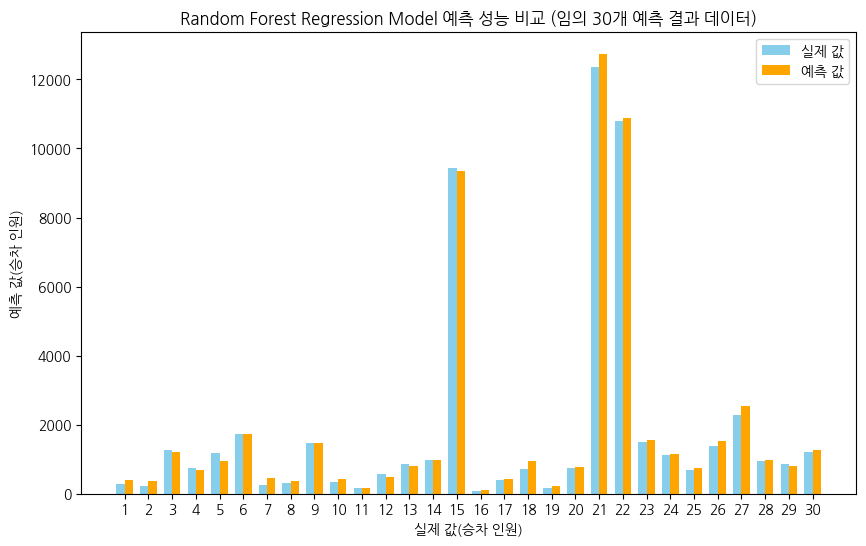

In [ ]:
# y_test, y_pred_rf 차이를 그래프로 비교 (대표 30개)
import numpy as np
import matplotlib.pyplot as plt

# y_test 데이터 중 앞 30개 추출
y_test_subset = y_test[:30]

# y_pred_rf 데이터 중 앞 30개 추출
y_pred_rf_subset = y_pred_rf[:30]

# 데이터 포인트 개수
n = len(y_test_subset)
indices = np.arange(n)

# 막대 너비 설정
bar_width = 0.35

# 그래프 생성
plt.figure(figsize=(10, 6))

# 정답 막대
plt.bar(indices - bar_width / 2, y_test_subset, bar_width, label='실제 값', color='skyblue')

# 예측 값 막대
plt.bar(indices + bar_width / 2, y_pred_rf_subset, bar_width, label='예측 값', color='orange')

# 그래프 꾸미기
plt.xlabel('실제 값(승차 인원)')
plt.ylabel('예측 값(승차 인원)')
plt.title('Random Forest Regression Model 예측 성능 비교 (임의 30개 예측 결과 데이터)')
plt.xticks(indices, [f'{i+1}' for i in range(n)])  # x축 레이블 설정
plt.legend()  # 범례 표시

# 그래프 표시
plt.show()

2. 랜덤 포레스트 회귀 모델 + minmax 3개월

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 준비
y = df3_mm['지하철_승객_수']
X = df3_mm.drop(columns=['지하철_승객_수'])

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# 모델 학습
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# 성능 평가
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("랜덤포레스트 성능 평가:")
print(f"MAE (평균 절대 오차): {mae_rf:.2f}")
print(f"MSE (평균 제곱 오차): {mse_rf:.2f}")
print(f"R^2 (결정계수): {r2_rf:.2f}")

랜덤포레스트 성능 평가:
MAE (평균 절대 오차): 106.07
MSE (평균 제곱 오차): 64036.61
R^2 (결정계수): 0.98


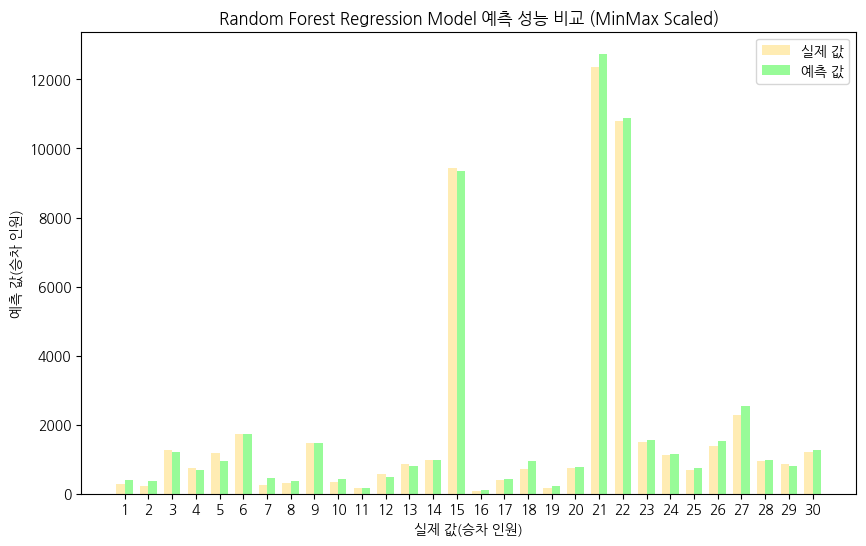

In [ ]:
# y_test, y_pred_rf 차이를 그래프로 비교 (대표 30개)
import numpy as np
import matplotlib.pyplot as plt

# y_test 데이터 중 앞 30개 추출
y_test_subset = y_test[:30]

# y_pred_rf 데이터 중 앞 30개 추출
y_pred_rf_subset = y_pred_rf[:30]

# 데이터 포인트 개수
n = len(y_test_subset)
indices = np.arange(n)

# 막대 너비 설정
bar_width = 0.35

# 그래프 생성
plt.figure(figsize=(10, 6))

# 정답 막대
plt.bar(indices - bar_width / 2, y_test_subset, bar_width, label='실제 값', color='#FFECB3')

# 예측 값 막대
plt.bar(indices + bar_width / 2, y_pred_rf_subset, bar_width, label='예측 값', color='#98FB98')

# 그래프 꾸미기
plt.xlabel('실제 값(승차 인원)')
plt.ylabel('예측 값(승차 인원)')
plt.title('Random Forest Regression Model 예측 성능 비교 (MinMax Scaled)')
plt.xticks(indices, [f'{i+1}' for i in range(n)])  # x축 레이블 설정
plt.legend()  # 범례 표시

# 그래프 표시
plt.show()

3. 랜덤 포레스트 회귀 모델 + standard 3개월

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 준비
y = df3_st['지하철_승객_수']
X = df3_st.drop(columns=['지하철_승객_수'])

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# 모델 학습
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# 성능 평가
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("랜덤포레스트 성능 평가:")
print(f"MAE (평균 절대 오차): {mae_rf:.2f}")
print(f"MSE (평균 제곱 오차): {mse_rf:.2f}")
print(f"R^2 (결정계수): {r2_rf:.2f}")

랜덤포레스트 성능 평가:
MAE (평균 절대 오차): 106.06
MSE (평균 제곱 오차): 64023.17
R^2 (결정계수): 0.98


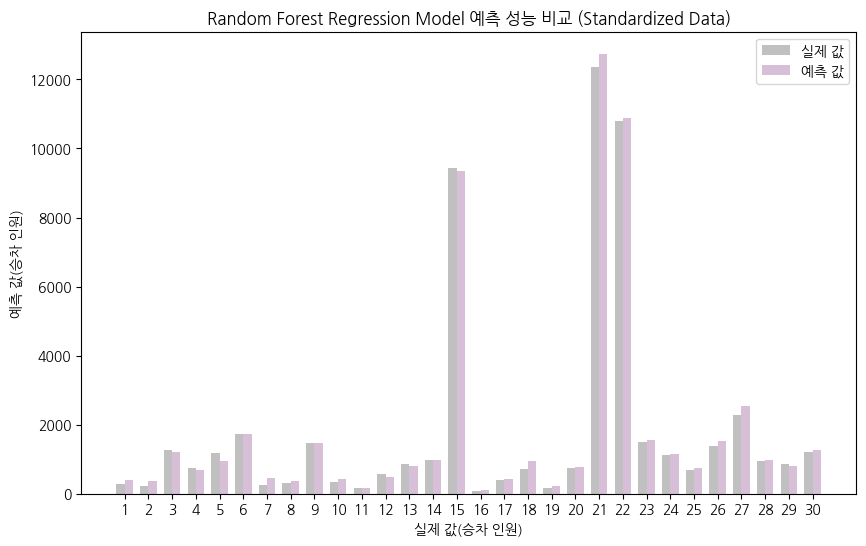

In [ ]:
# y_test, y_pred_rf 차이를 그래프로 비교 (대표 30개)
import numpy as np
import matplotlib.pyplot as plt

# y_test 데이터 중 앞 30개 추출
y_test_subset = y_test[:30]

# y_pred_rf 데이터 중 앞 30개 추출
y_pred_rf_subset = y_pred_rf[:30]

# 데이터 포인트 개수
n = len(y_test_subset)
indices = np.arange(n)

# 막대 너비 설정
bar_width = 0.35

# 그래프 생성
plt.figure(figsize=(10, 6))

# 정답 막대
plt.bar(indices - bar_width / 2, y_test_subset, bar_width, label='실제 값', color='#C0C0C0')

# 예측 값 막대
plt.bar(indices + bar_width / 2, y_pred_rf_subset, bar_width, label='예측 값', color='#D8BFD8')

# 그래프 꾸미기
plt.xlabel('실제 값(승차 인원)')
plt.ylabel('예측 값(승차 인원)')
plt.title('Random Forest Regression Model 예측 성능 비교 (Standardized Data)')
plt.xticks(indices, [f'{i+1}' for i in range(n)])  # x축 레이블 설정
plt.legend()  # 범례 표시

# 그래프 표시
plt.show()

## 5. 실제 문제 예측 수행
- 신강북선 예상 노선이 지나는 주요 자치구와 노선 이용 수요가 있을 것으로 예상되는 주변 행정동을 기반으로 수요 예측을 진행한다.
- 강북구(우이동, 수유동, 번동), 성북구(장위동, 석관동), 노원구(월계동), 동대문구(이문동, 휘경동), 중랑구(면목동, 상봉동)

In [ ]:
df = pd.read_csv('통합 학습 데이터셋.csv')

# 학교수 컬럼의 '-' 값을 0으로 변환
df['학교수'] = df['학교수'].replace('-', 0).astype(int)
print(df['학교수'])

df.head()

0         1
1         1
2         1
3         1
4         1
         ..
514704    4
514705    4
514706    4
514707    0
514708    6
Name: 학교수, Length: 514709, dtype: int64


,기준_날짜,자치구_명칭,행정동_명칭,행정동_ID,시간,지하철_승객_수,버스_승객_수,주말여부,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상),학교수,상권_변화_지표
0,2024-12-14,강동구,길동,11250740,6,180.0,59.0,1,7685.0,24507.0,14117.0,11459.0,1,4
1,2024-12-14,강동구,둔촌2동,11250710,6,159.0,98.0,1,3960.0,10190.0,5952.0,5175.0,1,1
2,2024-12-14,강동구,둔촌1동,11250700,6,164.0,23.0,1,1574.0,4335.0,2728.0,2107.0,1,2
3,2024-12-14,강동구,성내2동,11250660,6,866.0,152.0,1,3194.0,11341.0,5506.0,4411.0,1,4
4,2024-12-14,강동구,성내1동,11250650,6,177.0,75.0,1,3342.0,9419.0,5121.0,4298.0,1,1


In [ ]:
train_df = df[df['기준_날짜'] < '2024-11-01']

# 학습에 사용하지 않을 데이터 제거
train_df = train_df.drop(columns=['기준_날짜', '자치구_명칭', '행정동_명칭', '행정동_ID'])
train_df.head()

,시간,지하철_승객_수,버스_승객_수,주말여부,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상),학교수,상권_변화_지표
9944,6,379.0,245.0,0,7469.0,23514.0,13218.0,10711.0,1,4
9945,6,881.0,238.0,0,3892.0,10305.0,5903.0,5025.0,1,1
9946,6,424.0,50.0,0,763.0,1879.0,1322.0,930.0,1,2
9947,6,2060.0,334.0,0,3110.0,11066.0,5223.0,4177.0,1,4
9948,6,538.0,176.0,0,3348.0,9230.0,4896.0,3954.0,1,1


In [ ]:
target = ['우이동', '수유2동', '번1동', '장위2동', '월계2동', '석관동', '이문2동', '휘경1동', '면목본동', '상봉2동']

# 최신 일주일 데이터로 예측 진행
target_df = df[(df['기준_날짜'] >= '2024-11-25') & (df['기준_날짜'] <= '2024-12-01') & (df['행정동_명칭'].isin(target))]
target_df

,기준_날짜,자치구_명칭,행정동_명칭,행정동_ID,시간,지하철_승객_수,버스_승객_수,주말여부,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상),학교수,상권_변화_지표
3084,2024-12-01,노원구,월계2동,11110520,6,66.0,85.0,1,3202.0,7261.0,4627.0,4348.0,6,4
3089,2024-12-01,강북구,우이동,11090740,6,83.0,17.0,1,2962.0,6878.0,4601.0,3940.0,2,3
3093,2024-12-01,강북구,수유2동,11090640,6,51.0,232.0,1,2494.0,6053.0,4409.0,3697.0,2,4
3095,2024-12-01,강북구,번1동,11090600,6,617.0,257.0,1,3287.0,7151.0,3805.0,3025.0,2,4
3096,2024-12-01,성북구,석관동,11080850,6,271.0,144.0,1,4489.0,11064.0,6449.0,5329.0,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488886,2024-11-25,성북구,장위2동,11080770,22,150.0,193.0,0,1482.0,4002.0,2512.0,1998.0,8,2
488895,2024-11-25,중랑구,면목본동,11070710,22,170.0,434.0,0,3452.0,12068.0,7077.0,5183.0,2,4
488899,2024-11-25,중랑구,상봉2동,11070600,22,438.0,459.0,0,3519.0,13427.0,5423.0,3568.0,2,4
488902,2024-11-25,동대문구,이문2동,11060900,22,57.0,371.0,0,2483.0,5085.0,3177.0,2483.0,6,1


In [ ]:
# 날짜 기준 오름차순 정렬
target_df = target_df.sort_values(by='기준_날짜').reset_index(drop=True)

x_target = target_df.iloc[:, 4:]
x_target = x_target.drop(columns=['지하철_승객_수'])
x_target

,시간,버스_승객_수,주말여부,학생_생활인구수(10세-24세),직장인_생활인구수(25세-49세),중장년층_생활인구수(50세-64세),노년층_생활인구수(65세이상),학교수,상권_변화_지표
0,22,553.0,0,5521.0,6995.0,3007.0,2323.0,6,3
1,9,675.0,0,4369.0,8508.0,5715.0,5009.0,8,2
2,9,293.0,0,1333.0,3786.0,2629.0,1969.0,8,2
3,9,923.0,0,2563.0,8611.0,5883.0,4331.0,2,4
4,9,562.0,0,2262.0,9317.0,5369.0,3634.0,2,4
...,...,...,...,...,...,...,...,...,...
1185,12,755.0,1,3233.0,7021.0,4011.0,3262.0,2,4
1186,12,725.0,1,2466.0,5951.0,4268.0,3839.0,2,4
1187,11,485.0,1,3225.0,11240.0,6360.0,4841.0,2,4
1188,17,1391.0,1,3158.0,6951.0,4151.0,3200.0,2,4


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 준비
y = train_df['지하철_승객_수']
X = train_df.drop(columns=['지하철_승객_수'])

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# 모델 학습
rf_model.fit(X_train, y_train)

# 예측 테스트
y_pred_rf = rf_model.predict(X_test)

# 성능 평가
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("랜덤포레스트 성능 평가:")
print(f"MAE (평균 절대 오차): {mae_rf:.2f}")
print(f"MSE (평균 제곱 오차): {mse_rf:.2f}")
print(f"R^2 (결정계수): {r2_rf:.2f}")

랜덤포레스트 성능 평가:
MAE (평균 절대 오차): 106.08
MSE (평균 제곱 오차): 64045.27
R^2 (결정계수): 0.98


In [ ]:
# 실제 예측
y_pred_target = rf_model.predict(x_target)
y_pred_target

array([ 610.19, 1534.98,  700.93, ...,  643.02, 1524.45,   88.75])

In [ ]:
result = pd.DataFrame({'기준_날짜': target_df['기준_날짜'], '자치구_명칭': target_df['자치구_명칭'], '행정동_명칭': target_df['행정동_명칭'], '시간': target_df['시간'], '지하철_승객_수': y_pred_target})
result

,기준_날짜,자치구_명칭,행정동_명칭,시간,지하철_승객_수
0,2024-11-25,동대문구,휘경1동,22,610.19
1,2024-11-25,성북구,석관동,9,1534.98
2,2024-11-25,성북구,장위2동,9,700.93
3,2024-11-25,중랑구,면목본동,9,1623.20
4,2024-11-25,중랑구,상봉2동,9,1821.35
...,...,...,...,...,...
1185,2024-12-01,강북구,번1동,12,1659.98
1186,2024-12-01,강북구,수유2동,12,135.44
1187,2024-12-01,중랑구,면목본동,11,643.02
1188,2024-12-01,강북구,번1동,17,1524.45


In [ ]:
# 날짜 데이터로 요일 컬럼 생성
result['요일'] = pd.to_datetime(result['기준_날짜']).dt.day_name()

result

,기준_날짜,자치구_명칭,행정동_명칭,시간,지하철_승객_수,요일
0,2024-11-25,동대문구,휘경1동,22,610.19,Monday
1,2024-11-25,성북구,석관동,9,1534.98,Monday
2,2024-11-25,성북구,장위2동,9,700.93,Monday
3,2024-11-25,중랑구,면목본동,9,1623.20,Monday
4,2024-11-25,중랑구,상봉2동,9,1821.35,Monday
...,...,...,...,...,...,...
1185,2024-12-01,강북구,번1동,12,1659.98,Sunday
1186,2024-12-01,강북구,수유2동,12,135.44,Sunday
1187,2024-12-01,중랑구,면목본동,11,643.02,Sunday
1188,2024-12-01,강북구,번1동,17,1524.45,Sunday


In [ ]:
# 요일 컬럼은 데이터 앞 세 글자만 사용
result['요일'] = result['요일'].apply(lambda x: x[:3])
result

,기준_날짜,자치구_명칭,행정동_명칭,시간,지하철_승객_수,요일
0,2024-11-25,동대문구,휘경1동,22,610.19,Mon
1,2024-11-25,성북구,석관동,9,1534.98,Mon
2,2024-11-25,성북구,장위2동,9,700.93,Mon
3,2024-11-25,중랑구,면목본동,9,1623.20,Mon
4,2024-11-25,중랑구,상봉2동,9,1821.35,Mon
...,...,...,...,...,...,...
1185,2024-12-01,강북구,번1동,12,1659.98,Sun
1186,2024-12-01,강북구,수유2동,12,135.44,Sun
1187,2024-12-01,중랑구,면목본동,11,643.02,Sun
1188,2024-12-01,강북구,번1동,17,1524.45,Sun


In [ ]:
# 불필요한 컬럼 제거
result = result.drop(columns=['기준_날짜'])

# 요일 컬럼을 제일 앞으로 보냄
result = result[['요일'] + [col for col in result.columns if col != '요일']]
result

,요일,자치구_명칭,행정동_명칭,시간,지하철_승객_수
0,Mon,동대문구,휘경1동,22,610.19
1,Mon,성북구,석관동,9,1534.98
2,Mon,성북구,장위2동,9,700.93
3,Mon,중랑구,면목본동,9,1623.20
4,Mon,중랑구,상봉2동,9,1821.35
...,...,...,...,...,...
1185,Sun,강북구,번1동,12,1659.98
1186,Sun,강북구,수유2동,12,135.44
1187,Sun,중랑구,면목본동,11,643.02
1188,Sun,강북구,번1동,17,1524.45


In [ ]:
result.to_csv('예측 결과(일주일).csv', index=False)

## 6. 예측 결과 시각화

In [ ]:
result = pd.read_csv('예측 결과(일주일).csv')
result

,요일,자치구_명칭,행정동_명칭,시간,지하철_승객_수
0,Mon,동대문구,휘경1동,22,610.19
1,Mon,성북구,석관동,9,1534.98
2,Mon,성북구,장위2동,9,700.93
3,Mon,중랑구,면목본동,9,1623.20
4,Mon,중랑구,상봉2동,9,1821.35
...,...,...,...,...,...
1185,Sun,강북구,번1동,12,1659.98
1186,Sun,강북구,수유2동,12,135.44
1187,Sun,중랑구,면목본동,11,643.02
1188,Sun,강북구,번1동,17,1524.45


In [ ]:
# 자치구, 요일별 비교
# result 데이터프레임을 [요일, 자치구 명칭]을 기준으로 그룹핑하고 지하철 승객 수를 합산

result_sum = result.groupby(['요일', '자치구_명칭'])['지하철_승객_수'].sum().reset_index()
result_sum

,요일,자치구_명칭,지하철_승객_수
0,Fri,강북구,42843.52
1,Fri,노원구,4982.06
2,Fri,동대문구,26687.58
3,Fri,성북구,29939.67
4,Fri,중랑구,37736.36
5,Mon,강북구,41868.55
6,Mon,노원구,5025.16
7,Mon,동대문구,27089.01
8,Mon,성북구,30005.14
9,Mon,중랑구,37225.52


<ipython-input-307-14c1dc9a3238>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data['요일'] = pd.Categorical(region_data['요일'], categories=days, ordered=True)


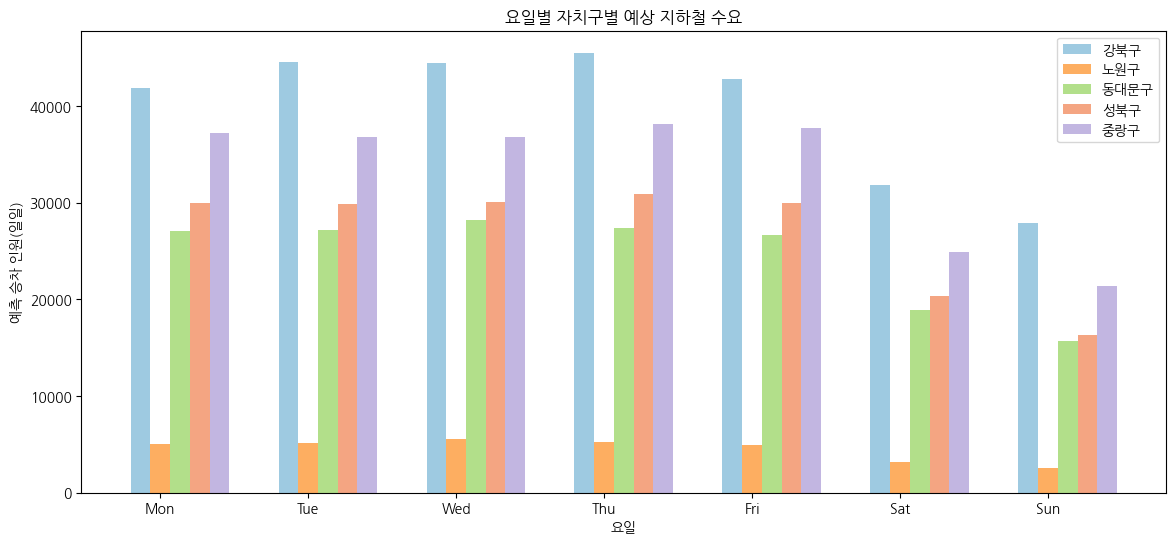

In [ ]:
# x축을 요일, y축을 지하철 승객 수로 해서 자치구별로 막대 그래프를 그린다.

# 요일과 지역 리스트 생성
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
regions = result_sum['자치구_명칭'].unique()

gap = 0.5  # 요일별 간격을 위한 값
x = np.arange(len(days)) * (1 + gap) # 요일에 대한 x축 인덱스

# 그래프 설정
plt.figure(figsize=(14, 6))

# 그래프 색상
colors = [
    '#9ecae1',  # 파스텔 블루
    '#fdae61',  # 파스텔 오렌지
    '#b2df8a',  # 파스텔 그린
    '#f4a582',  # 부드러운 핑크
    '#c2b6e1',  # 부드러운 보라
    '#b3cde3',  # 연한 블루
    '#fbb4ae',  # 파스텔 핑크
    '#92c5de'   # 연한 청록색
]

# 각 지역에 대해 막대 그래프 그리기
bar_width = 0.2  # 막대 너비
for i, region in enumerate(regions):
    region_data = result_sum[result_sum['자치구_명칭'] == region]

    # 요일 컬럼을 Categorical로 변환하여 정렬
    region_data['요일'] = pd.Categorical(region_data['요일'], categories=days, ordered=True)
    region_data = region_data.sort_values('요일')

    plt.bar(x + i * bar_width, region_data['지하철_승객_수'], width=bar_width, label=region, color=colors[i])

# x축 눈금과 레이블 설정
plt.xticks(x + bar_width, days)
plt.xlabel('요일')
plt.ylabel('예측 승차 인원(일일)')
plt.title('요일별 자치구별 예상 지하철 수요')
plt.legend()

plt.show()


In [ ]:
# prompt: result_sum의 자치구 명칭 중 노원구에 해당하는 행은 성북구에 지하철 승객 수를 더하고 삭제

# 노원구 행을 찾아서 성북구의 지하철 승객 수를 더하고 노원구 행 삭제
nowon = result_sum[result_sum['자치구_명칭'] == '노원구']['지하철_승객_수'].values[0]
result_sum.loc[result_sum['자치구_명칭'] == '성북구', '지하철_승객_수'] += nowon
result_sum = result_sum[result_sum['자치구_명칭'] != '노원구']

result_sum

,요일,자치구_명칭,지하철_승객_수
0,Fri,강북구,42843.52
2,Fri,동대문구,26687.58
3,Fri,성북구,34921.73
4,Fri,중랑구,37736.36
5,Mon,강북구,41868.55
7,Mon,동대문구,27089.01
8,Mon,성북구,34987.20
9,Mon,중랑구,37225.52
10,Sat,강북구,31846.72
12,Sat,동대문구,18886.20


<ipython-input-305-52c5f46a3a92>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data['요일'] = pd.Categorical(region_data['요일'], categories=days, ordered=True)


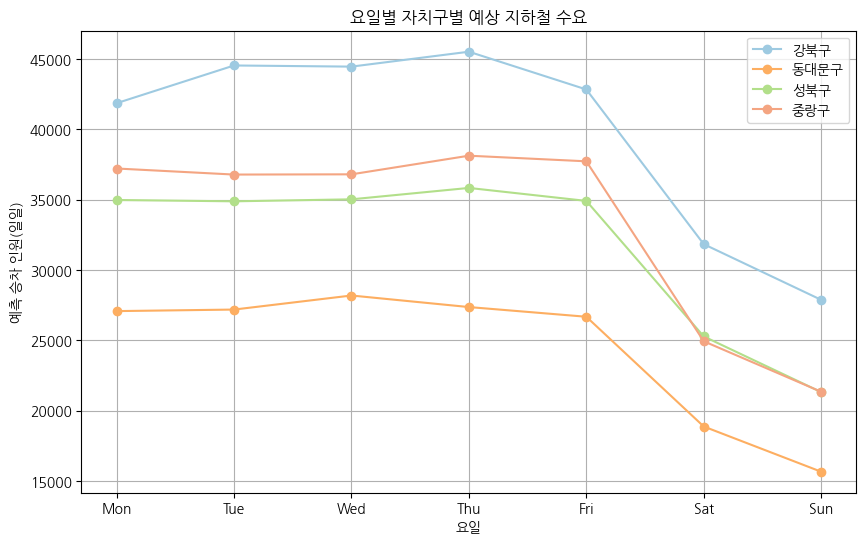

In [ ]:
# 요일과 지역 리스트 생성
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
regions = result_sum['자치구_명칭'].unique()

# 선 그래프 설정
plt.figure(figsize=(10, 6))

# 그래프 색상
colors = [
    '#9ecae1',  # 파스텔 블루
    '#fdae61',  # 파스텔 오렌지
    '#b2df8a',  # 파스텔 그린
    '#f4a582',  # 부드러운 핑크
    '#c2b6e1',  # 부드러운 보라
    '#b3cde3',  # 연한 블루
    '#fbb4ae',  # 파스텔 핑크
    '#92c5de'   # 연한 청록색
]

# 각 지역에 대해 선 그래프 그리기
for i, region in enumerate(regions):
    region_data = result_sum[result_sum['자치구_명칭'] == region]

    # 요일 컬럼을 Categorical로 변환하여 정렬
    region_data['요일'] = pd.Categorical(region_data['요일'], categories=days, ordered=True)
    region_data = region_data.sort_values('요일')

    plt.plot(region_data['요일'], region_data['지하철_승객_수'], marker='o', linestyle='-', color=colors[i], label=region)

# 그래프 설정
plt.xlabel('요일')
plt.ylabel('예측 승차 인원(일일)')
plt.title('요일별 자치구별 예상 지하철 수요')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# 행정동, 시간별 비교
result_time = result.loc[result['요일'] == 'Mon', '행정동_명칭':]

# 시간 컬럼 기준 오름차순 정렬
result_time = result_time.sort_values(by='시간').reset_index(drop=True)
result_time

,행정동_명칭,시간,지하철_승객_수
0,월계2동,6,294.63
1,우이동,6,298.97
2,장위2동,6,645.20
3,면목본동,6,956.77
4,상봉2동,6,976.78
...,...,...,...
165,번1동,22,619.79
166,면목본동,22,162.39
167,이문2동,22,47.19
168,수유2동,22,23.09


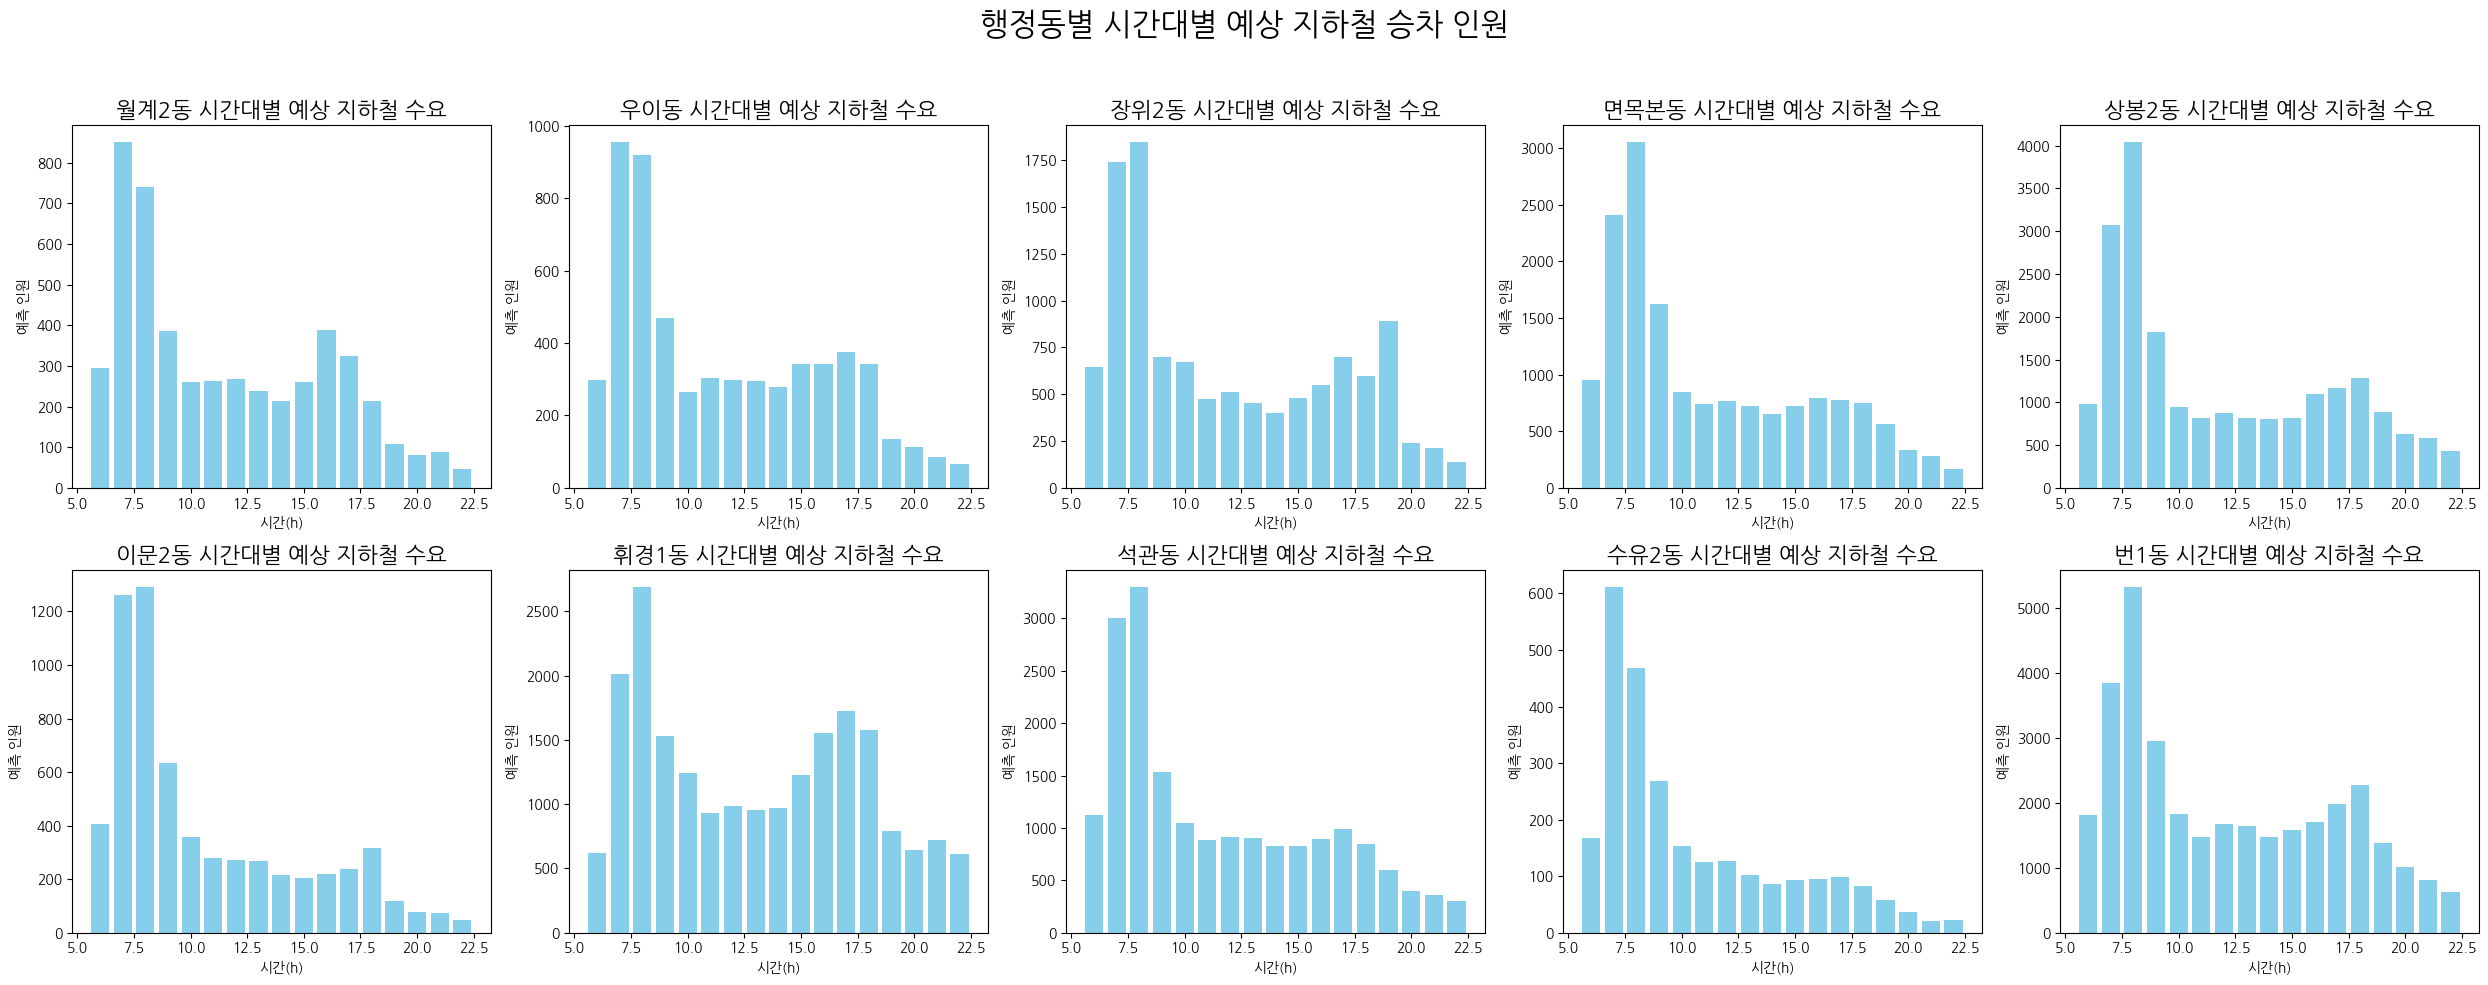

In [ ]:
# 고유한 행정동 리스트 추출
regions = result_time['행정동_명칭'].unique()

# 총 그래프 수 및 레이아웃 설정 (2행 5열)
fig, axes = plt.subplots(2, 5, figsize=(25, 10))
fig.suptitle('행정동별 시간대별 예상 지하철 승차 인원', fontsize=22)

# 각 서브플롯에 그래프 그리기
for i, region in enumerate(regions):
    row = i // 5
    col = i % 5
    ax = axes[row, col]

    # 해당 행정동의 데이터 추출
    region_data = result_time[result_time['행정동_명칭'] == region]

    # 막대 그래프 그리기
    ax.bar(region_data['시간'], region_data['지하철_승객_수'], color='skyblue')

    # 그래프 제목 및 레이블 설정
    ax.set_title(f'{region} 시간대별 예상 지하철 수요', fontsize=16)
    ax.set_xlabel('시간(h)')
    ax.set_ylabel('예측 인원')

# 레이아웃 조정
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 전체 제목과 겹치지 않도록 조정
plt.show()


In [ ]:
# 일 평균 지하철 사용 인원 계산
# result 결과를 요일별로 묶어서 승객 수를 sum
result_day = result.groupby('요일')['지하철_승객_수'].sum().round(0).reset_index()

# 컬럼 이름 변경
result_day.rename(columns={'지하철_승객_수': '예측_승차_인원(명)'}, inplace=True)

# 요일을 월화수목금토일 순으로 정렬
result_day['요일'] = pd.Categorical(result_day['요일'], categories=days, ordered=True)
result_day = result_day.sort_values('요일').reset_index(drop=True)

result_day

,요일,예측_승차_인원(명)
0,Mon,141213.0
1,Tue,143546.0
2,Wed,145080.0
3,Thu,147108.0
4,Fri,142189.0
5,Sat,99149.0
6,Sun,83811.0


In [ ]:
date_mean = result_day['예측_승차_인원(명)'].mean().round(0)
print('일 평균 예측 승차 인원: ', date_mean)
print('월 평균 예측 승차 인원: ', date_mean * 30)

일 평균 예측 승차 인원:  128871.0
월 평균 예측 승차 인원:  3866130.0


In [ ]:
weekday_mean = result_day.loc[result_day['요일'].isin(['Mon', 'Tue', 'Wed', 'Thu', 'Fri']), '예측_승차_인원(명)'].mean().round(0)
weekend_mean = result_day.loc[result_day['요일'].isin(['Sat', 'Sun']), '예측_승차_인원(명)'].mean().round(0)

print('평일 예측 승차 인원: ', weekday_mean)
print('주말 예측 승차 인원: ', weekend_mean)

print('월 평균 예측 승차 인원', ((weekday_mean * 5) + (weekend_mean * 2)) * 4)

평일 예측 승차 인원:  143827.0
주말 예측 승차 인원:  91480.0
월 평균 예측 승차 인원 3608380.0
